In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
# %config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning



import os ## imporing os
print(os.listdir("input/"))

['titanic']


##  Loading Datasets
<a id="load_data"></a>
***

In [2]:
## Importing the datasets
train = pd.read_csv("input/titanic/train.csv")
test = pd.read_csv("input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
temp = train.groupby("Sex")['Age'].min().to_frame().reset_index()

In [5]:
temp

,Sex,Age
0,female,0.75
1,male,0.42


In [6]:
temp = temp.rename(columns={"Age": "min_age"})

In [7]:
temp

,Sex,min_age
0,female,0.75
1,male,0.42


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 粗略查看数据集 
<a id="glimpse"></a>
***

# 训练集

In [10]:
%%time
train.sample(5)

CPU times: total: 0 ns
Wall time: 0 ns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S


# 测试集

In [11]:
## Take a look at the overview of the dataset. 
%timeit test.sample(5)

89.1 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


This is a sample of train and test dataset. Lets find out a bit more about the train and test dataset. 

In [12]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())
print("-----------------------------------------------------------")
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----------------------------------------------------------
The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 41

In [13]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'><noscript><a href='#'><img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic_data_mining&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

现实世界中的数据集通常很混乱，但是这个数据集几乎是干净的。 让我们分析并看看我们这里有什么。

In [14]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId
## We will drop PassengerID and Ticket since it will be useless for our data. 
#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

## 2b. 处理缺失值
<a id="dealwithnullvalues"></a>
***
***train* 数据集中缺失值。**

In [15]:
# Let's write a functin to print the total percentage of the missing values.(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """打印缺失值的百分比"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [16]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


***测试*集中缺失值。**

In [17]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


我们看到 **train** 和 **test** 数据集中都有缺失值。 让我们从“Embarked”开始努力填补这些缺失的值。

### Embarked feature
***

In [18]:
def percent_value_counts(df, feature):
    """
    这个函数接收一个 DataFrame 和一个列名，并计算该列中所有值的百分比。

    参数：
        df: 包含数据的 DataFrame。
        feature: 要计算百分比的列名。

    返回：
        一个 DataFrame，其中包含每个值的计数和百分比。
    """

    # 计算每个值在该列中出现的百分比
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2))

    # 创建一个包含总数的 DataFrame
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna=False))

    # 将百分比和总数 DataFrame 合并
    total.columns = ["Total"]
    percent.columns = ["Percent"]
    return pd.concat([total, percent], axis=1)



In [19]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


看起来 Embarked 特征中只有两个空值（~ 0.22 %），我们可以用模式值“S”替换它们。 然而，让我们更深入地挖掘一下。

**让我们看看这两个空值是什么**

In [20]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


我们也许能够通过查看两个原始数据的其他自变量来解决这两个缺失值。 两名乘客均支付了 80 美元的票价，均为 P 级 1 级乘客，性别为女性。 让我们看看 **Fare** 如何在所有 **Pclass** 和 **Embarked** 特征值之间分配

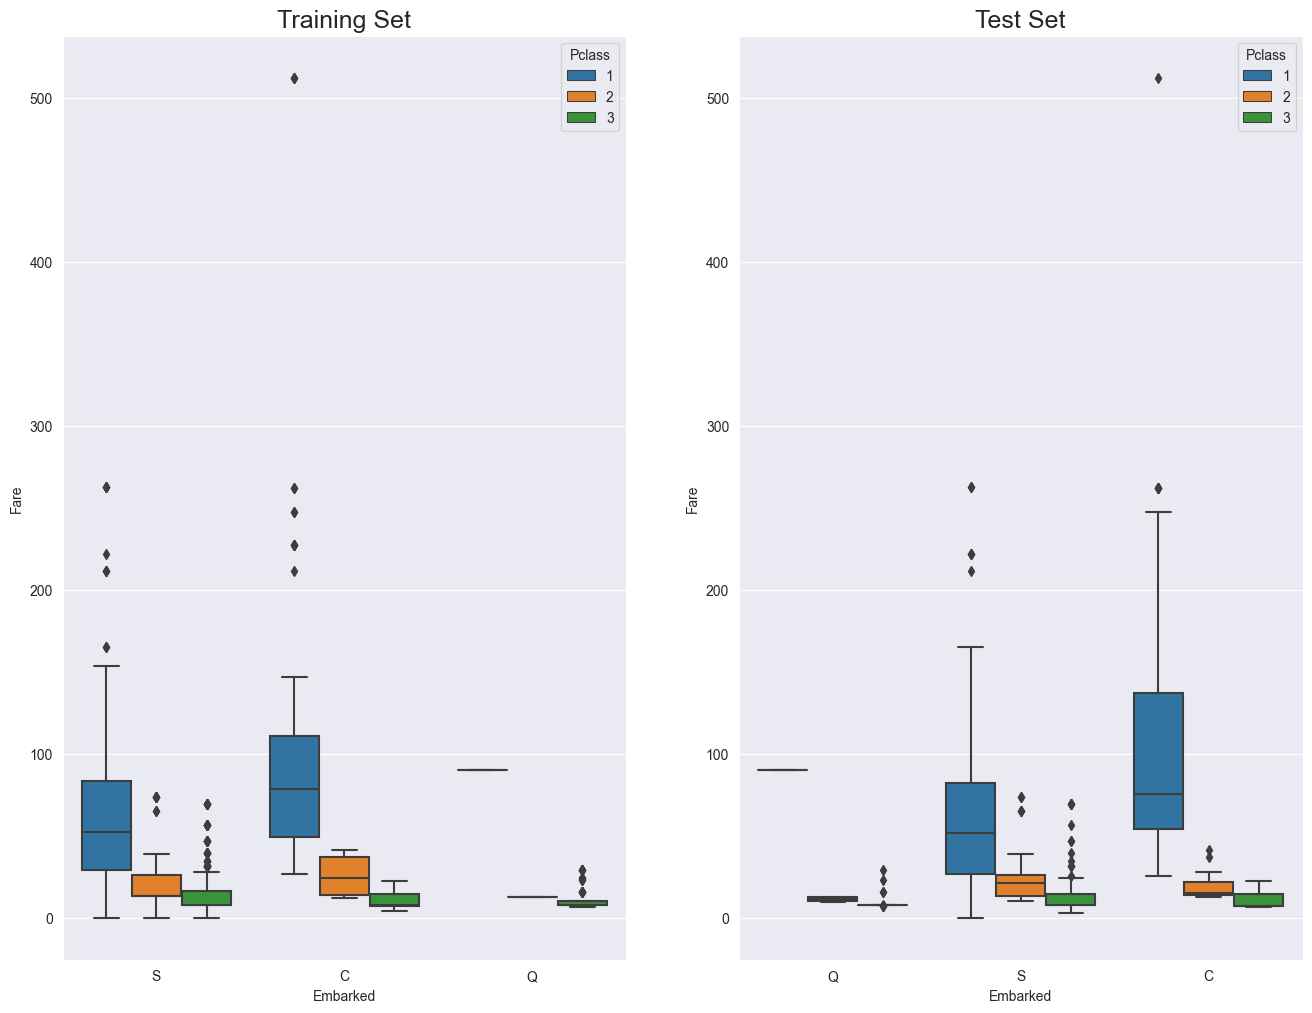

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


# ## Fixing legends
# leg_1 = ax1.get_legend()
# leg_1.set_title("PClass")
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')

fig.show()

在这里，在训练集和测试集中，最接近 80 美元的平均票价位于 pclass 为 1 的 <b>C</b> Embarked 值中。因此，让我们将缺失值填充为“C”

In [22]:
## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

### Cabin Feature
***

In [23]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


训练数据中大约有 77% 的 Cabin 特征缺失，测试数据中大约有 78% 的 Cabin 特征缺失。
我们有两个选择，
* 我们可以去掉整个功能，或者
* 我们可以集思广益，找到合适的方法来使用它们。 例如，我们可以说有客舱记录的乘客比其他人有更高的社会经济地位。 我们还可以说，有客舱记录的乘客在上船时更有可能被考虑在内。

让我们首先组合训练和测试数据，现在将所有空值分配为 **“N”**

In [24]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

所有客舱名称均以英文字母开头，后跟多个数字。 似乎有一些乘客以自己的名义预订了多间客舱房间。 这是因为他们中的许多人与家人一起旅行。 然而，他们似乎都是用同一个字母预订的，后面跟着不同的数字。 看起来字母比数字更有意义。 因此，我们可以根据小屋名称的字母对这些小屋进行分组。

In [25]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [28]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


所以，我们还没有做任何有效的工作来替换空值。 让我们在这里停下来思考一下我们如何利用这里的一些其他功能。
* 我们可以使用票价列的平均值我们可以使用pythons ***groupby***函数来获取每个舱位字母的平均票价。

In [29]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

现在，如果我们将每个未知的小屋行与上面给定的平均值进行比较，这些方法可以帮助我们确定未知的小屋。 让我们编写一个简单的函数，以便我们可以根据平均值给出小屋名称。

In [30]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

让我们在每个未知的小屋（具有 <b>null</b> 值的小屋）中应用 <b>cabin_estimator</b> 函数。 一旦完成，我们将分离我们的训练和测试，以继续机器学习建模。

In [31]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

In [32]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

### Fare Feature
***
如果您到目前为止已经注意了，您就会知道票价栏中只有一个缺失值。 让我们来吧。

In [33]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


在这里，我们可以取 **Fare** 列的平均值来填充 NaN 值。 然而，为了学习和练习，我们会尝试一些别的东西。 我们可以取平均值，其中 **Pclass** 为 ***3***，**Sex** 为 ***male***，**Embarked** 为 ***S***

In [35]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

### Age Feature
***
我们知道“年龄”这一特征是缺失值最多的特征，让我们以百分比的形式来看它。

In [37]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


我们将采取不同的方法，因为训练和测试数据集中年龄列中的 **~20% 数据丢失**。 年龄变量似乎有望确定生存率。 因此，用中位数、均值或众数来替换缺失值是不明智的。 我们将使用机器学习模型随机森林回归器来估算缺失值而不是空值。 我们暂时保持年龄列不变，并在特征工程部分进行处理。

# 第 3 部分. 可视化和特征关系
<a id="visualization_and_feature_relations" ></a>
***
在我们深入寻找自变量和因变量（幸存者）之间的关系之前，让我们对特征之间的关系如何产生一些假设。

**假设：**
- 性别：女性幸存者多于男性
- P 级：社会经济地位较高的乘客比其他人更容易幸存。
- 年龄：年轻乘客比其他乘客存活率更高。
- 票价：票价较高的乘客比其他乘客存活率更高。 这与Pclass有很大关系。


现在，让我们通过创建一些可视化来了解这些功能如何相互关联。

## 3a. Gender and Survived
<a id="gender_and_survived"></a>
***

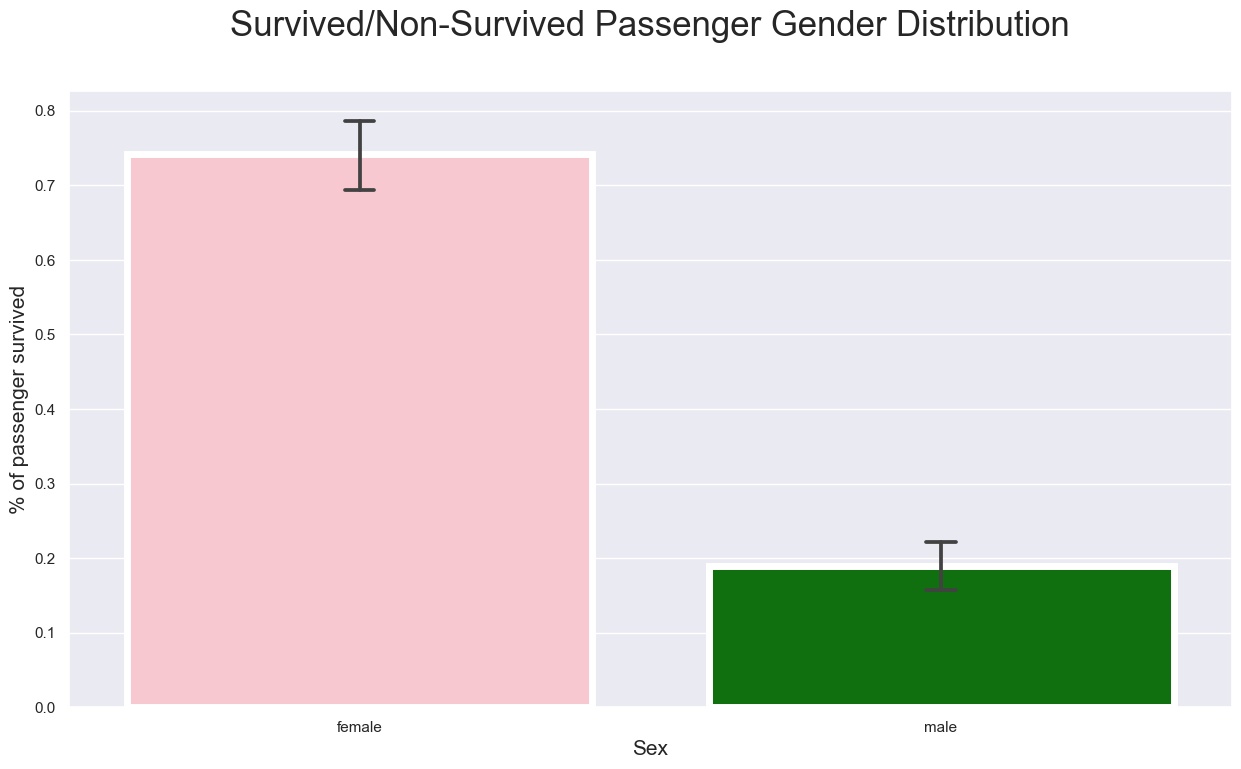

In [38]:
import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);



上面的条形图显示了幸存的女性和男性的分布。 **x_label*** 代表**性别**特征，而**y_label*** 代表**乘客幸存**的百分比。 该条形图显示约 74% 的女性乘客幸存，而只有约 19% 的男性乘客幸存。

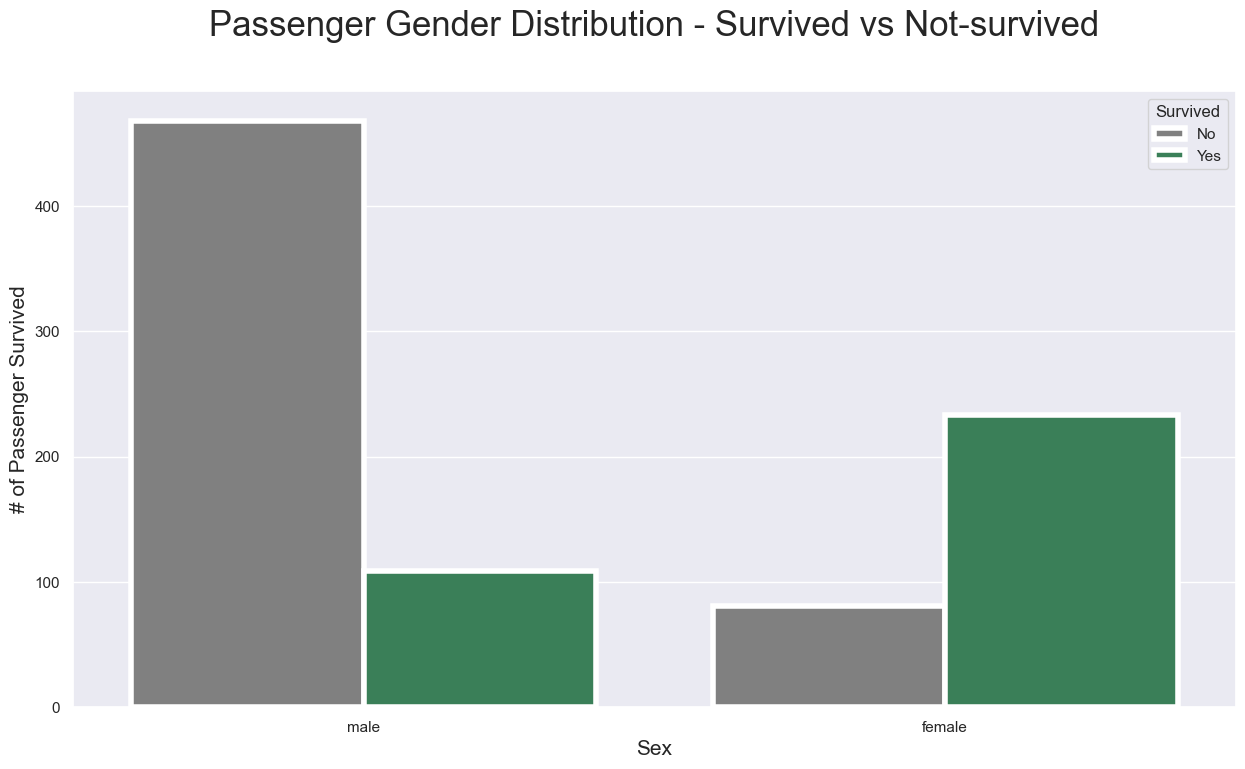

In [39]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

该计数图显示了幸存和未幸存的男性和女性乘客的实际分布。 结果显示，在所有雌性中，约有 230 只幸存，约 70 只未能幸存。 而男性乘客中，约有 110 人幸存，约 480 人死亡。

**概括**
***
- 正如我们所怀疑的，女性乘客的生存率比男性乘客高得多。
- 这似乎是正确的，因为女性和儿童是优先考虑的。

## 3b. Pclass and Survived
<a id="pcalss_and_survived"></a>
***

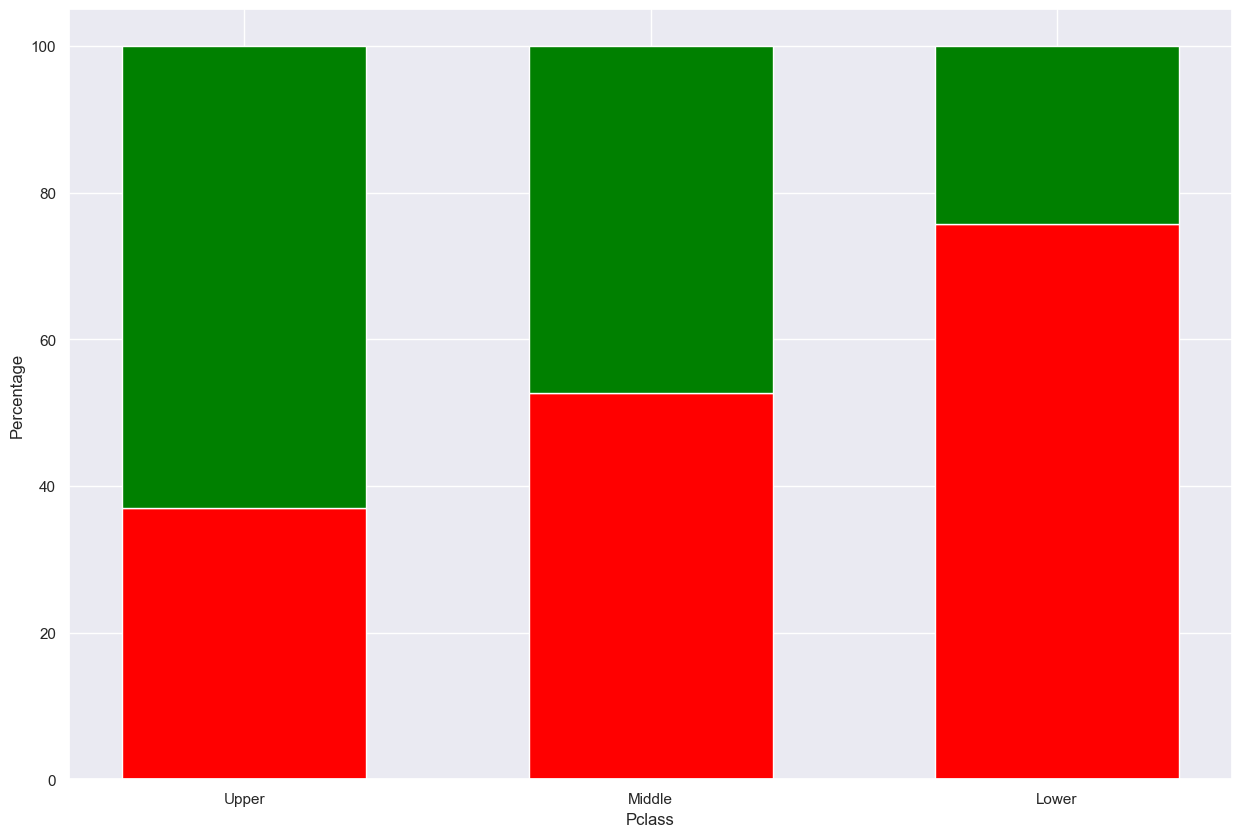

In [40]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (15,10))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='Green', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')
 
# Show graphic
plt.show()


In [41]:
temp_df

,No,Yes
Pclass,,
1,80,136
2,97,87
3,372,119


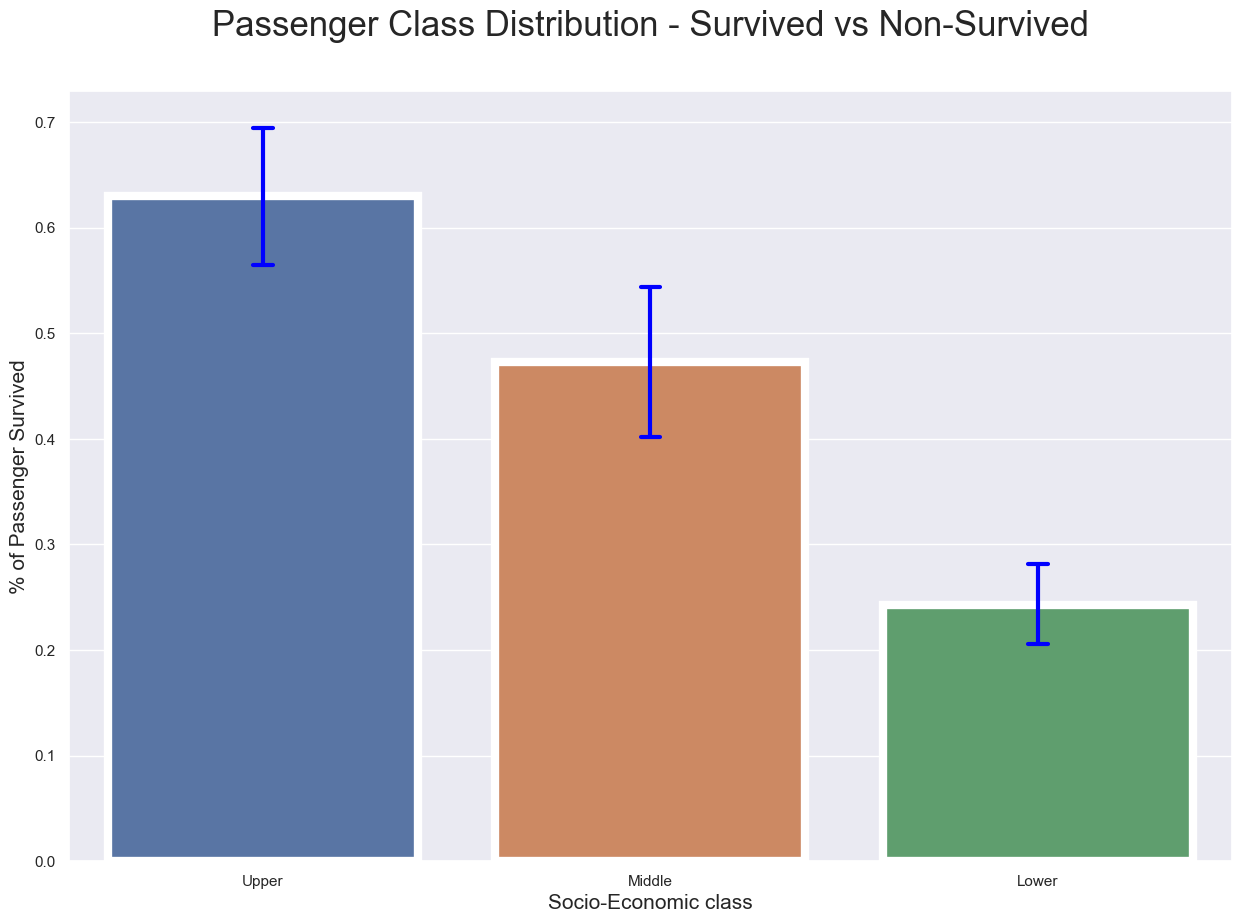

In [42]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

- 看起来像 ...
     - ~ 63% 的头等舱乘客在泰坦尼克号悲剧中幸存，而
     - ~ 48% 二等和
     - ~只有24%的三等舱乘客幸存。

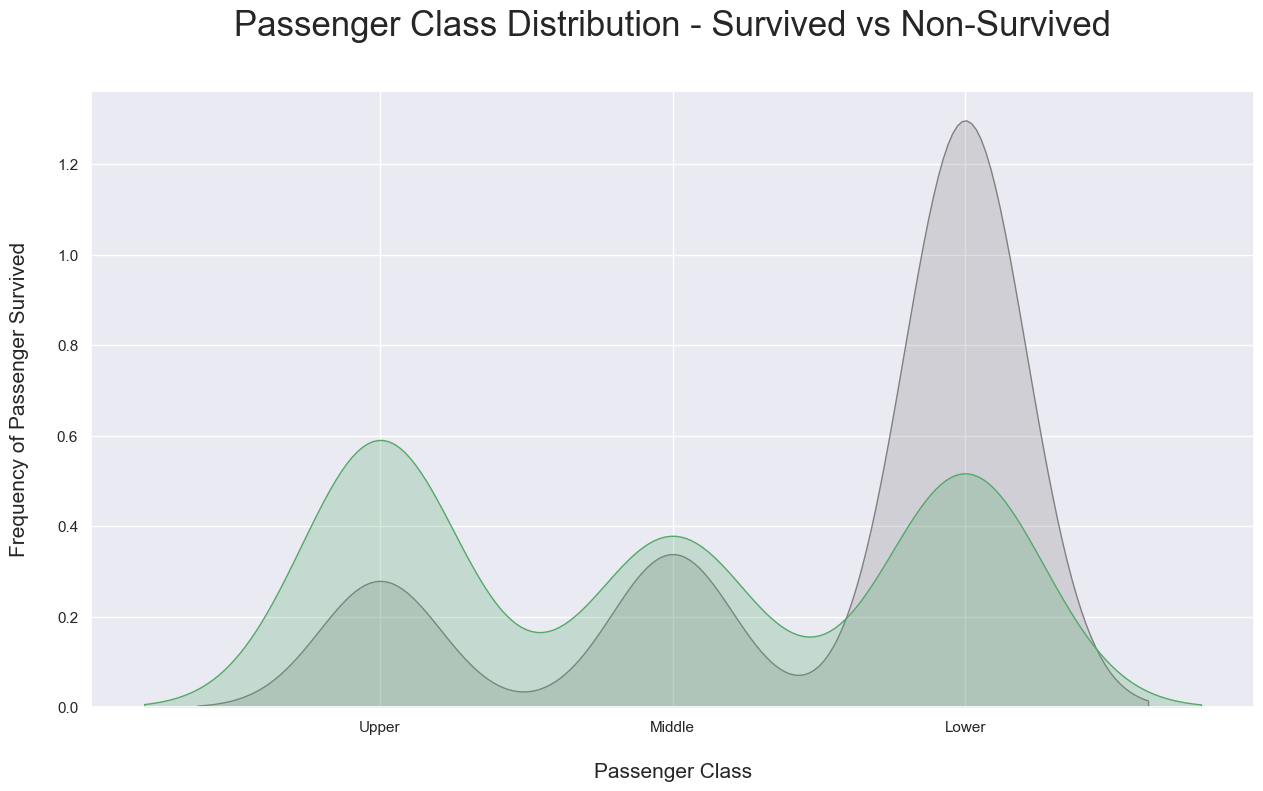

In [43]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

该 KDE 图非常不言自明，包含所有标签和颜色。 我注意到一些读者可能会觉得有疑问的事情是，低等舱乘客比二等舱乘客的存活率更高。 确实如此，因为三等舱的乘客比一等舱和二等舱的乘客多得多。

**概括**
***
在这场悲剧中，头等舱乘客占据了上风。 您可能会在这一点上更加同意我的观点，在可视化的下一部分中，我们将研究票价的分布和幸存列。

## 3c. Fare and Survived
<a id="fare_and_survived"></a>
***

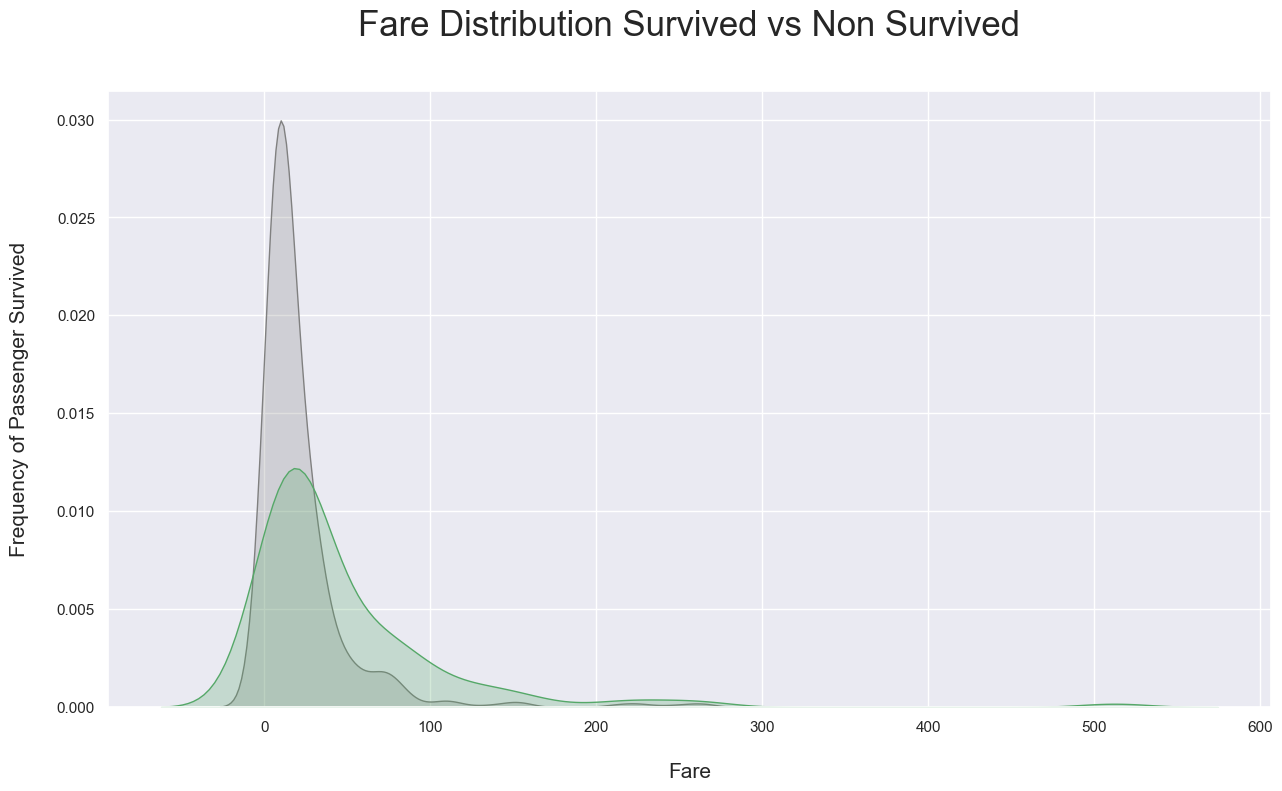

In [44]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);



这个情节显示了一些令人印象深刻的东西..
- 图中 100 美元以下的峰值表示许多购买该范围内机票的乘客未能幸存。
- 当票价大约超过 280 美元时，没有灰色阴影，这意味着要么每个通过该票价点的人都幸存下来，要么可能存在一个异常值影响了我们的判断。 让我们检查...

In [45]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


正如我们所假设的，它看起来像是一个异常值，票价为 512 美元。 我们当然可以删除这一点。 不过，我们暂时保留它。 克...

## 3d. Age and Survived
<a id="age_and_survived"></a>
***

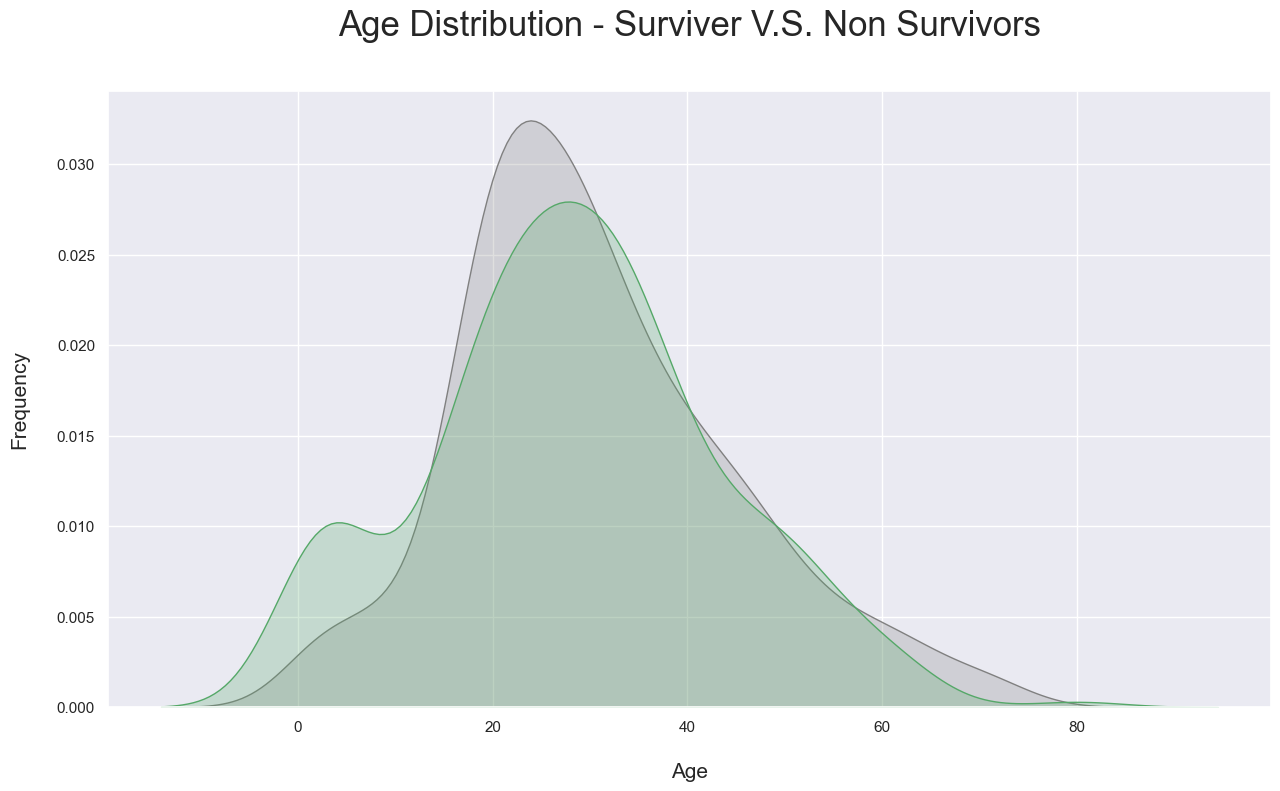

In [46]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

除了分布的最左边部分之外，该图没有任何异常之处。 这可能暗示儿童和婴儿可能是优先考虑的对象。

## 3e. 组合特征关系
<a id='combined_feature_relations'></a>
***
在本节中，我们将在单个图中发现两个以上的特征关系。 我会尽力说明大部分特征关系。 让我们开始吧。

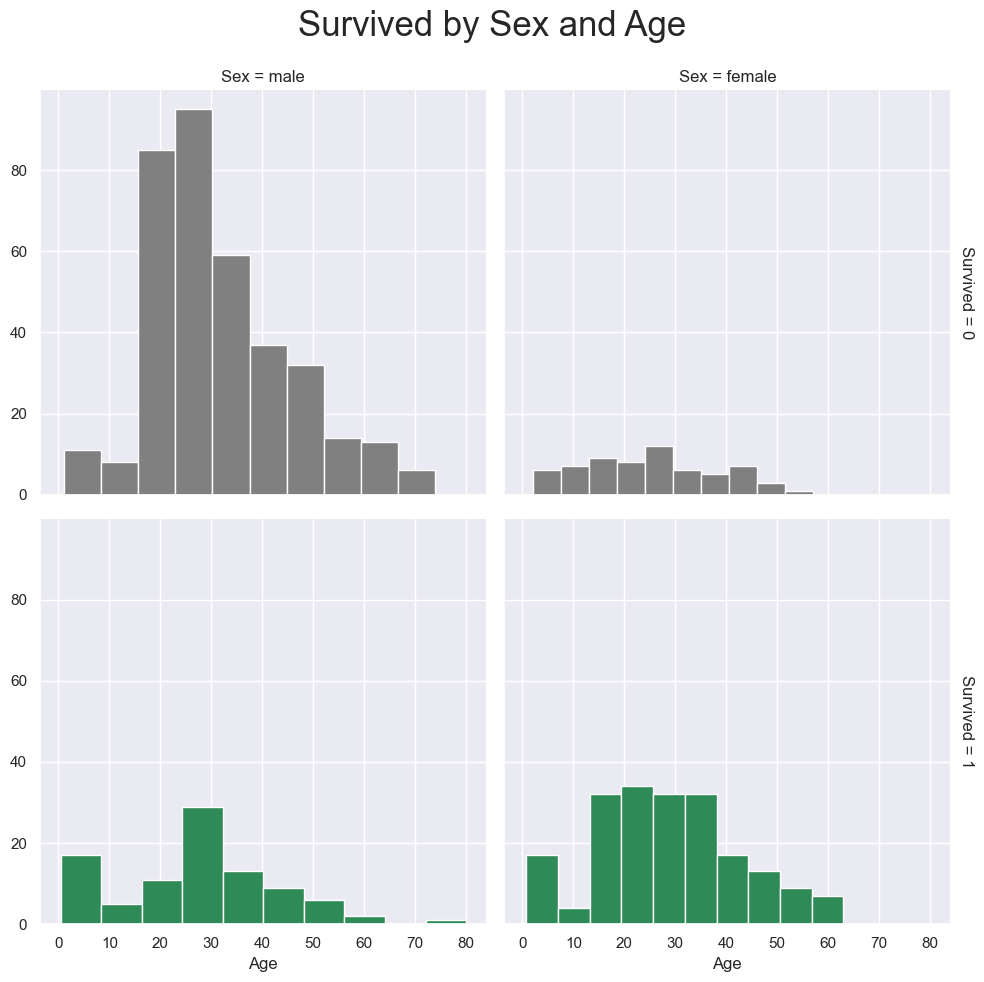

In [47]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,height=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


Facetgrid 是同时可视化多个变量及其关系的好方法。 从第 3a 部分的图表中我们可以看出，在悲剧发生期间，女性乘客比男性乘客有更好的优先权。 然而，从这个方面网格中，我们还可以了解哪些年龄段的人比其他年龄段的人存活率更高，或者没有那么幸运

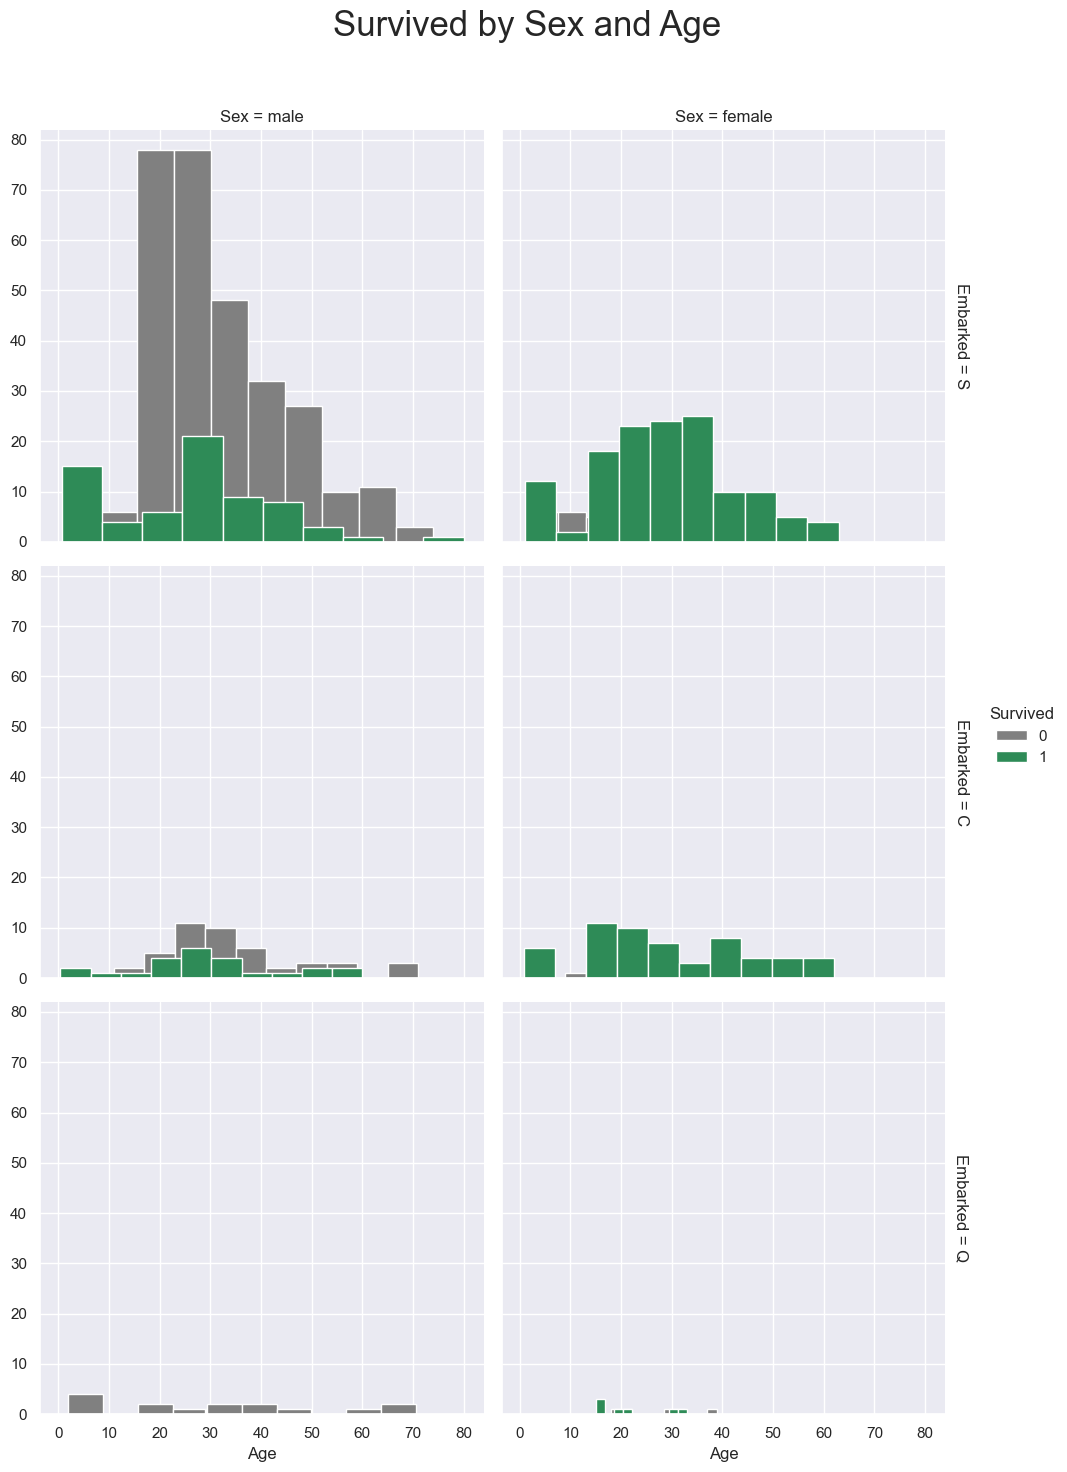

In [48]:
g = sns.FacetGrid(train,height=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

这是另一个引人注目的方面网格，同时说明了四个特征的关系。 他们是**登船、年龄、幸存和性别**。
* 颜色表示乘客的生存状态（绿色表示幸存，灰色表示未幸存）
* 该栏代表性别（左边为男性，右边为女性）
* 该行代表已登船（从上到下：S、C、Q）
***
现在我已经排除了表面现象，让我们看看是否可以获得一些在我们查看数据时并不那么明显的见解。
* 大多数乘客似乎是在南安普敦（S）登机的。
* 超过 60% 的乘客在南安普顿登机时死亡。
* 超过 60% 的乘客居住在 Cherbourg(C) 上。
* 几乎所有登上皇后镇（Q）的男性都没有幸存。
* 皇后镇上登上的女性很少，但大多数都幸存下来。

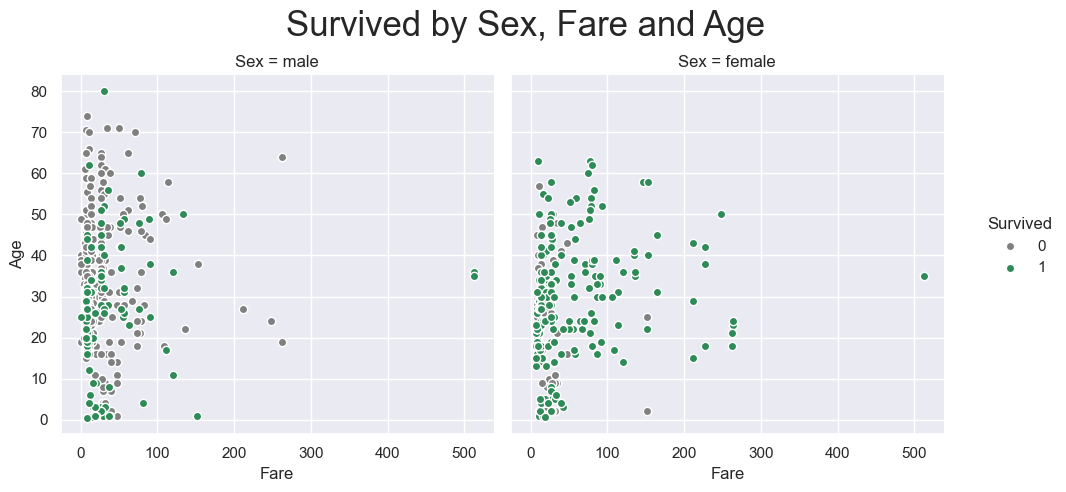

In [49]:
g = sns.FacetGrid(train, height=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

这个方面网格揭示了一些有趣的见解。 让我们来看看吧。
* 上面的网格清楚地显示了票价超过 500 美元的三个异常值。 在这一点上，我认为我们非常有信心应该删除这些异常值。
* 大多数乘客的票价范围为 100 美元。

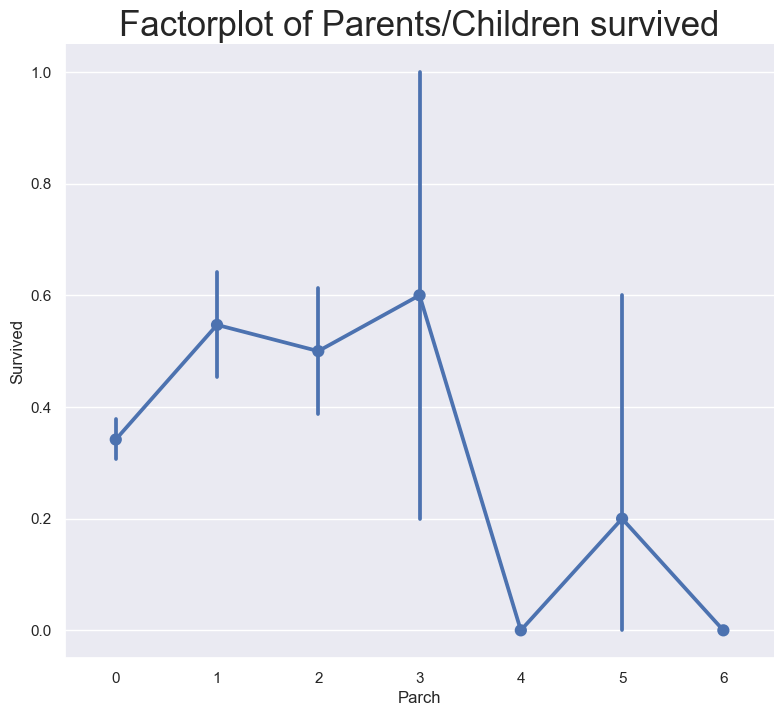

In [50]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.catplot(x = "Parch", y = "Survived", data = train,kind = "point", height= 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

**与父母/孩子一起大型团体旅行的乘客的存活率低于其他乘客。**

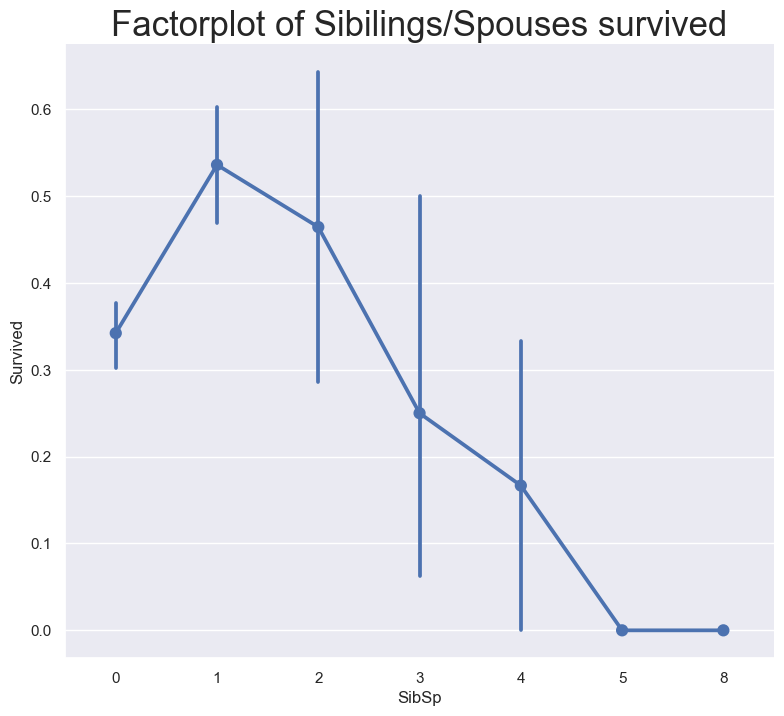

In [51]:
sns.catplot(x =  "SibSp", y = "Survived", data = train,kind = "point",height = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

**然而，与兄弟姐妹/配偶一起小规模旅行的乘客比其他乘客有更好的生存机会。**

In [52]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Part 4: 统计概述
<a id="statisticaloverview"></a>
***

![title](https://cdn-images-1.medium.com/max/400/1*hFJ-LI7IXcWpxSLtaC0dfg.png)

**Train info**

In [53]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [54]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [55]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [56]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [57]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


我从上面的统计概述中收集了一个小摘要。 让我们看看它们是什么...
- 该训练数据集有 891 个原始数据和 9 个列。
- 在那场悲剧中，只有 38% 的乘客幸存。
- 约 74% 的女性乘客幸存，而男性乘客仅约 19% 幸存。
- 约 63% 的头等舱乘客幸存，而只有 24% 的低等舱乘客幸存。

## 4a. 相关矩阵和热图
<a id="heatmap"></a>
***
### 相关性

In [58]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


** 性别是最重要的相关特征，与 *Survived（因变量）* 特征相关，其次是 Pclass。**

In [59]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

**对相关性特征进行平方不仅给出正相关性，而且还放大了关系。**

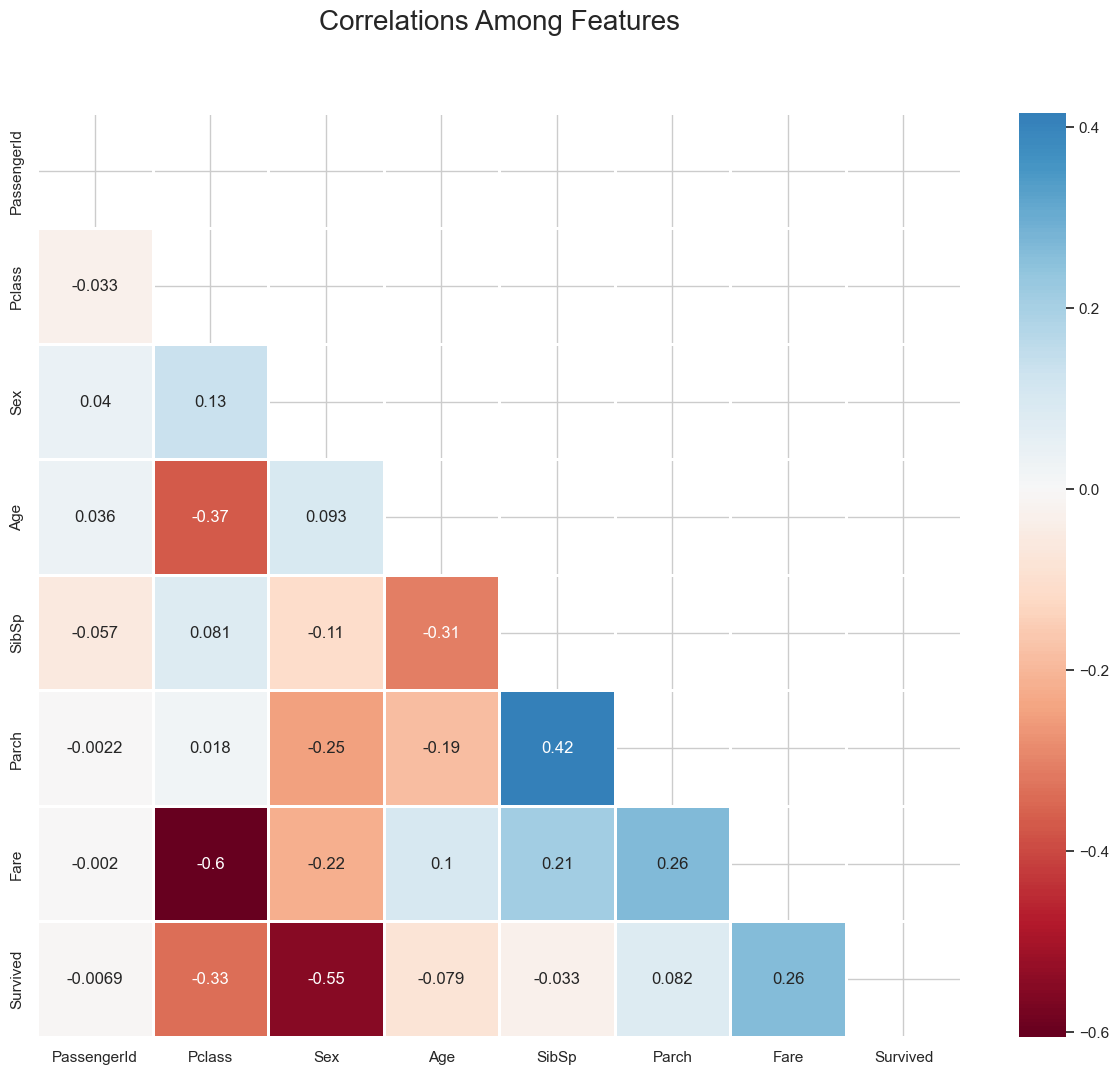

In [60]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

#### 正相关特征：
- 票价和生存：0.26

#### 负相关特征：
- 票价和头等舱：-0.6
- 性和幸存：-0.55
- P级和幸存：-0.33


**所以，让我们稍微分析一下这些相关性。**我们发现不同特征之间存在一些中等强度的关系。 票价和生存评级之间存在明确的正相关关系。 这种关系表明，为机票支付更多费用的乘客更有可能生存。 这一理论与另一种相关性相一致，即票价与 Pclass(-0.6) 之间的相关性。 这种关系可以这样解释：头等舱乘客 (1) 比二等舱乘客 (2) 支付更多的票价，同样，二等舱乘客比三等舱乘客 (3) 支付更多的票价。 这个理论也可以通过提到另一个 Pclass 与我们的因变量 Survived 的相关性来支持。 Pclass 和 Survived 之间的相关性为 -0.33。 这也可以解释为头等舱乘客比二等舱或三等舱乘客有更好的生存机会。

然而，与我们的因变量最显着的相关性是性别变量，它是有关乘客是男性还是女性的信息。 这种负相关性的幅度为 -0.54，这表明了一些不可否认的见解。 让我们做一些统计，看看这种相关性在统计上有多显着。

#### 正相关特征：
- 票价和生存：0.26

#### 负相关特征：
- 票价和头等舱：-0.6
- 性和幸存：-0.55
- P级和幸存：-0.33


**所以，让我们稍微分析一下这些相关性。**我们发现不同特征之间存在一些中等强度的关系。 票价和生存评级之间存在明确的正相关关系。 这种关系表明，为机票支付更多费用的乘客更有可能生存。 这一理论与另一种相关性相一致，即票价与 Pclass(-0.6) 之间的相关性。 这种关系可以这样解释：头等舱乘客 (1) 比二等舱乘客 (2) 支付更多的票价，类似地二等舱 ## 4b。 相关性统计检验
<a id="statistical_test"></a>
***

统计检验是证明理论有效性的科学方法。 无论如何，当我们查看数据时，我们似乎对数据将我们引向何方有直观的了解。 然而，当我们进行统计测试时，我们会从科学或数学的角度来了解这些结果的重要性。 让我们应用其中一些方法，看看我们的预测效果如何。

### 假设检验大纲

假设检验比较对照组和实验组的均值，并试图找出两个样本均值是否彼此不同，如果不同，差异有多大。
 
**假设检验**通常由多个部分组成：

1. 提出一个完善的研究问题：假设检验通常从一个具体且完善的研究问题开始。 我们需要提出可以通过统计分析来回答的正确问题。
2. **原假设($H_0$)和备择假设($H_1$)**：
> * **零假设($H_0$)** 是假设为真的东西。 这是现状。 在零假设中，观察结果纯粹是偶然的结果。 当我们开始实验时，我们通过说对照组和实验组的平均值没有差异来形成原假设。
> * **替代假设($H_A$)** 是一个主张，与原假设相反。 这是违背现状的。 在另一种理论中，观察结果显示了真实的效果与机会变化的组成部分相结合。
    
3. 确定**检验统计量**：检验统计量可用于评估原假设的真实性。 根据标准差，我们使用 t 统计量或 z 统计量。 除此之外，我们还想确定测试是单尾测试还是双尾测试。 [此](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative-hypotheses/ ）文章很好地解释了这一点。 [这篇](https://stattrek.com/hypothesis-test/hypothesis-testing.aspx)文章也相当不错。

4. 指定**显着性水平**和**置信区间**：显着性水平($\alpha$) 是当原假设为真时拒绝原假设的概率。 换句话说，即使原假设是正确的，我们也能多次拒绝原假设，这让我们感到很舒服/有信心。 这个相当大的数额是我们的重要水平。 除此之外，显着性水平是一减去我们的置信区间。 例如，如果我们说显着性水平为 5%，那么我们的置信区间将为 (1 - 0.05) = 0.95 或 95%。

5. 计算 **T 统计量/Z 统计量**：计算 t 统计量遵循一个简单的方程。 根据一个样本测试或两个样本测试，该方程略有不同

6. 计算 **P 值**：P 值是假设原假设正确时获得的检验统计量至少与观察到的检验统计量一样显着的概率。 众所周知，p 值是不直观的，甚至许多教授都对其解释错误。 我认为这个 [视频](https://www.youtube.com/watch?v=E4KCfcVwzyw) 很好地解释了 p 值。 **P 值越小，反对原假设的证据就越有力。**

7. **描述结果并将p值与显着性值($\alpha$)进行比较**：如果p<=$\alpha$，则观察到的效果具有统计显着性，排除原假设， 并且备择假设有效。 然而，如果 p> $\alpha$，我们就不能拒绝原假设。 尽管这句话在语法上是错误的，但在逻辑上却是正确的。 我们绝不会仅仅因为我们正在使用样本数据点进行统计检验而接受原假设。

我们将按照上述每个步骤进行下面的假设检验。

附： 可汗学院有一组我认为很直观的视频，可以帮助我从概念上理解。

***

### 泰坦尼克号的假设检验
#### 制定一个完善的研究问题：
对于这个数据集，我们可以通过提出以下问题来制定原假设和备择假设。
> * **幸存乘客和未幸存乘客的平均性别是否存在显着差异？**。
> * **男女乘客的生存率是否存在显着差异？**


#### 原假设和备择假设：
我们可以通过提出不同的问题来制定我们的假设。 然而，了解我们的最终目标是什么至关重要。 这里我们的因变量或目标变量是**幸存**。 因此，我们说

> ** 零假设($H_0$)：** 男性和女性乘客的生存率没有差异。 或者男性和女性乘客的生存率平均差异为零。
> ** 替代假设($H_A$)：** 男性和女性乘客的生存率存在差异。 或者男性和女性存活率的平均差异不为零。


我们能做的一件事就是尝试建立原假设和备择假设，这样当我们进行 t 检验时，我们可以选择进行单尾检验。 根据[此](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative- 假设/）文章中，单尾检验比双尾检验更强大。 除此之外，[此](https://www.youtube.com/watch?v=5NcMFlrnYp8&list=PLIeGtxpvyG-LrjxQ60pxZaimkaKKs0zGF)视频对于理解这些主题也很有帮助。 考虑到这一点，我们可以更新/修改我们的原假设和备择假设。 让我们看看如何重写这个..

> **原假设(H0)：**男性平均值大于或等于女性平均值。

> **替代假设(H1)：**男性平均值小于女性平均值。

#### 确定测试统计量：
> 这将是一个双尾测试，因为男性和女性乘客的生存率差异可能高于或低于 0。
> 由于我们不知道标准差($\sigma$) 并且 n 很小，因此我们将使用 t 分布。

#### 指定显着性水平：
> 指定显着性水平是假设检验的重要步骤。 它是 1 类错误和 2 类错误之间的最终平衡。 我们将在另一课中更深入地讨论这些内容。 目前，我们决定使显着性水平($\alpha$) = 0.05。 因此，我们的置信区间或非拒绝区域将为 (1 - $\alpha$)=(1-0.05) = 95%。

#### 计算 T 统计量和 P 值：
让我们随机抽取一个样本，看看有什么不同。

In [61]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


现在，我们必须明白，这两个均值不是**总体均值 ($\bar{\mu}$)**。 *总体平均值是统计学家用来表示整个群体的实际平均值的统计术语。 该组可以是多个数字的任意集合，例如动物、人类、植物、金钱、股票。*例如，要查找保加利亚的年龄人口平均值； 我们必须考虑每个人的年龄并计算他们的年龄。 如果我们走那条路，这几乎是不可能的； 首先进行统计是没有意义的。 因此，我们使用样本集来解决这个问题。 使用样本集的想法是： 如果我们从同一总体中获取多个样本并取它们的平均值并将它们放入分布中； 最终，分布开始看起来更像**正态分布**。 我们采集的样本越多，添加的样本均值就越多，正态分布就越接近总体均值。 这就是**中心极限理论**的由来。 稍后我们将更深入地讨论这个主题。

回到我们的数据集，就像我们所说的，上面的这些方法是整个故事的一部分。 我们获得了部分数据来训练我们的机器学习模型，而另一部分数据则被保留用于测试。 因此，我们目前不可能知道男性和女性的人口生存方式。 像这样的情况需要采用统计方法。 我们将采用抽样分布的方法来进行检验。 让我们从训练数据中随机抽取 50 个男性和女性样本。

In [62]:
# separating male and female dataframe. 
import random
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

## empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50,)))
    

# Print them out
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

Male mean sample mean: 0.19
Male mean sample mean: 0.73
Difference between male and female mean sample mean: 0.54


H0：男性平均值大于或等于女性平均值<br>
H1：男性平均值小于女性平均值。

根据样本，我们的男性样本 ($\bar{x}_m$) 和女性样本 ($\bar{x}_f$) 平均测量差异约为 0.55（统计上这称为男性总体平均值的点估计） 女性人口平均值）。 请记住...
* 我们随机选择50人为男性组，50人为女性组。
* 我们知道我们的样本是从更广泛的人群（训练集）中选择的。
* 我们知道我们完全可能得到不同的男性和女性随机样本。
***
考虑到上述所有三点，我们对测量到的差异是否真实或具有统计显着性有多大信心？ 我们可以执行 **t 检验** 来评估这一点。 当我们执行**t检验**时，我们通常试图找出**总体平均值与假设平均值（1个样本t检验）之间存在显着差异的证据，或者在我们的例子中两个总体平均值（2个样本）之间的差异 t 检验）。**



**t-统计量**是通过我们的测量方差标准化的我们的组差异程度的度量。 换句话说，它基本上是信噪比的衡量标准。 为了澄清起见，让我们对前一句进行更多描述。 我将使用[这篇文章](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like- 告诉孩子清理厨房里的混乱）作为描述此处 t 统计量的参考。


#### 计算 t 统计量
# $$t = \frac{\bar{x}-\mu}{\frac{S} {\sqrt{n}} }$$

这里..
* $\bar{x}$ 是样本平均值。
* $\mu$ 是假设平均值。
* S 是标准差。
* n 是样本大小。


1. 现在，这个分数的分母 $(\bar{x}-\mu)$ 基本上就是信号的强度。 我们计算假设平均值和样本平均值之间的差异。 如果平均差越大，则信号越强。

该分数的分子 **${S}/ {\sqrt{n}}$** 计算数据集的变化量或噪声量。 这里S是标准差，它告诉我们数据中有多少变化。 n 是样本量。

因此，根据上面的解释，t 值或 t 统计量基本上是衡量数据中信号强度（差异）与噪声量（变化）的关系，这就是我们计算 t 值的方式 在一个样本 t 检验中。 然而，为了计算两个样本总体平均值之间或在我们的例子中，我们将使用以下方程。

# $$t = \frac{\bar{x}_M - \bar{x}_F}{\sqrt {s^2 (\frac{1}{n_M} + \frac{1}{n_F})}} $$

这个方程可能看起来太复杂，但是，这两个方程背后的想法是相似的。 它们都有信号/噪声的概念。 唯一的区别是我们用另一个样本均值替换假设均值，并且两个样本量替换一个样本量。

这里..
* $\bar{x}_M$ 是我们男性组样本测量值的平均值。
* $ \bar{x}_F$ 是女性组样本的平均值。
* $n_M$ 和 $n_F$ 是每组中观测值的样本数。
* $S^2$ 是样本方差。

了解背景中发生的事情是有好处的。 但是，我们将使用 **scipy.stats** 来查找 t 统计量。

#### 将 P 值与 $\alpha$ 进行比较
> 与我们的显着性水平 ($\alpha$)0.05 相比，p 值看起来非常小。 我们的观察样本具有统计显着性。 因此，我们的原假设被排除，我们的备择假设成立，即“**男性和女性乘客的生存率存在显着差异。”**

# 第 5 部分：特征工程
<a id="feature_engineering"></a>
***
特征工程正如它听起来的那样。 有时我们想在已有的特征中创建额外的特征，有时我们想删除相似的特征。 特征工程是完成所有这些工作的简单词。 重要的是要记住，我们将以不会导致**多重共线性（当自变量之间存在关系时）**发生的方式创建新特征。

## 名称长度
***创建一个新功能“name_length”，它将计算每个名字的字母数***

In [63]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## 这里的“map”是python的内置函数。
## “map”函数基本上采用一个函数并且
## 返回一个可迭代的列表/元组，或者在本例中为系列。
## 然而，“map”也可以像map(function)一样使用，例如 地图（名称_长度_组）
## 或 map(function, iterable{list, tuple}) 例如 地图（名称_长度_组，火车[特征]]）。
## 但是，这里我们不需要对 name_length_group 使用参数（“size”），因为当我们
## 使用像“.map”这样的地图函数，在点之前加上一系列，我们基本上是在暗示该系列
## 和可迭代。 这类似于 python 中的 .append 方法。 list.append(a) 表示在列表上应用追加。


## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

＃＃ 标题
**获取每个名字的标题作为一项新功能。**

In [64]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
## Whenever we split like that, there is a good change that we will end up with while space around our string values. Let's check that. 

In [65]:
print(train.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


In [66]:
## Let's fix that
train.title = train.title.apply(lambda x: x.strip())

In [67]:
## We can also combile all three lines above for test set here
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]

## However it is important to be able to write readable code, and the line above is not so readable. 

In [68]:
## Let's replace some of the rare values with the keyword 'rare' and other word choice of our own. 
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]


## 现在编程中有一个术语叫做 DRY（不要重复自己），每当我们重复时
## 一遍又一遍地重复相同的代码，我们的脑海中应该有一个灯泡亮起并让我们思考
## 以不重复或乏味的方式编码。 让我们编写一个函数来完成我们想要做的事情
## 在上面的代码中做了，只是不重复而且更有趣。 

In [69]:
## we are writing a function that can help us modify title column
def name_converted(feature):
    """
    This function helps modifying the title column
    """
    
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

test.title = test.title.map(name_converted)
train.title = train.title.map(name_converted)

In [70]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


## 家庭规模
***创建一个名为“family_size”的新功能。***

In [71]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [72]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [73]:
## apply the family_group function in family_size
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

## is_alone

In [74]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

## ticket

In [75]:
train.Ticket.value_counts().sample(10)

315096              1
330958              1
STON/O2. 3101283    1
A4. 54510           1
65306               1
SC/Paris 2123       3
250655              2
SCO/W 1585          1
347060              1
233639              1
Name: Ticket, dtype: int64

我还没有弄清楚如何最好地管理票证功能。 因此，任何建议将不胜感激。 现在，我将取消票证功能。

In [76]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

## calculated_fare

In [77]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

有些人与家人或朋友等团体一起旅行。 看来票价一栏记录的是总票价而不是单个乘客的票价，因此计算票价在这种情况下会很方便。

## fare_group

In [78]:
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

票价组根据<i>calculated_fare</i>计算。 这可以进一步帮助我们的事业。

## PassengerId

看起来 <i>PassengerId</i> 列仅用作此数据集中的 ID，对数据集没有任何重大影响。 让我们放下它吧。

In [79]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

## 创建虚拟变量

您可能想知道什么是虚拟变量？

虚拟变量是重要的**预处理机器学习步骤**。 很多时候，分类变量是一个重要的特征，这可能是一个好的模型和一个伟大的模型之间的区别。 在处理数据集时，具有有意义的值（例如“男性”或“女性”）而不是 0 和 1 对我们来说更直观。 然而，机器不理解分类值的值，例如，在这个数据集中，我们的性别是男性或女性，算法不接受分类变量作为输入。 为了在机器学习模型中提供数据，我们

In [80]:

train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

## age

正如我之前所承诺的，我们将在本节中使用随机森林回归器来预测缺失的年龄值。 我们开始做吧

In [81]:
train.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,1,22.0,1,0,0,0,3.62500,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,0,38.0,1,0,1,0,35.64165,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,26.0,0,0,1,1,7.92500,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0,35.0,1,0,1,0,26.55000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,35.0,0,0,0,1,8.05000,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [82]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [83]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

我们看一下年龄列的直方图。

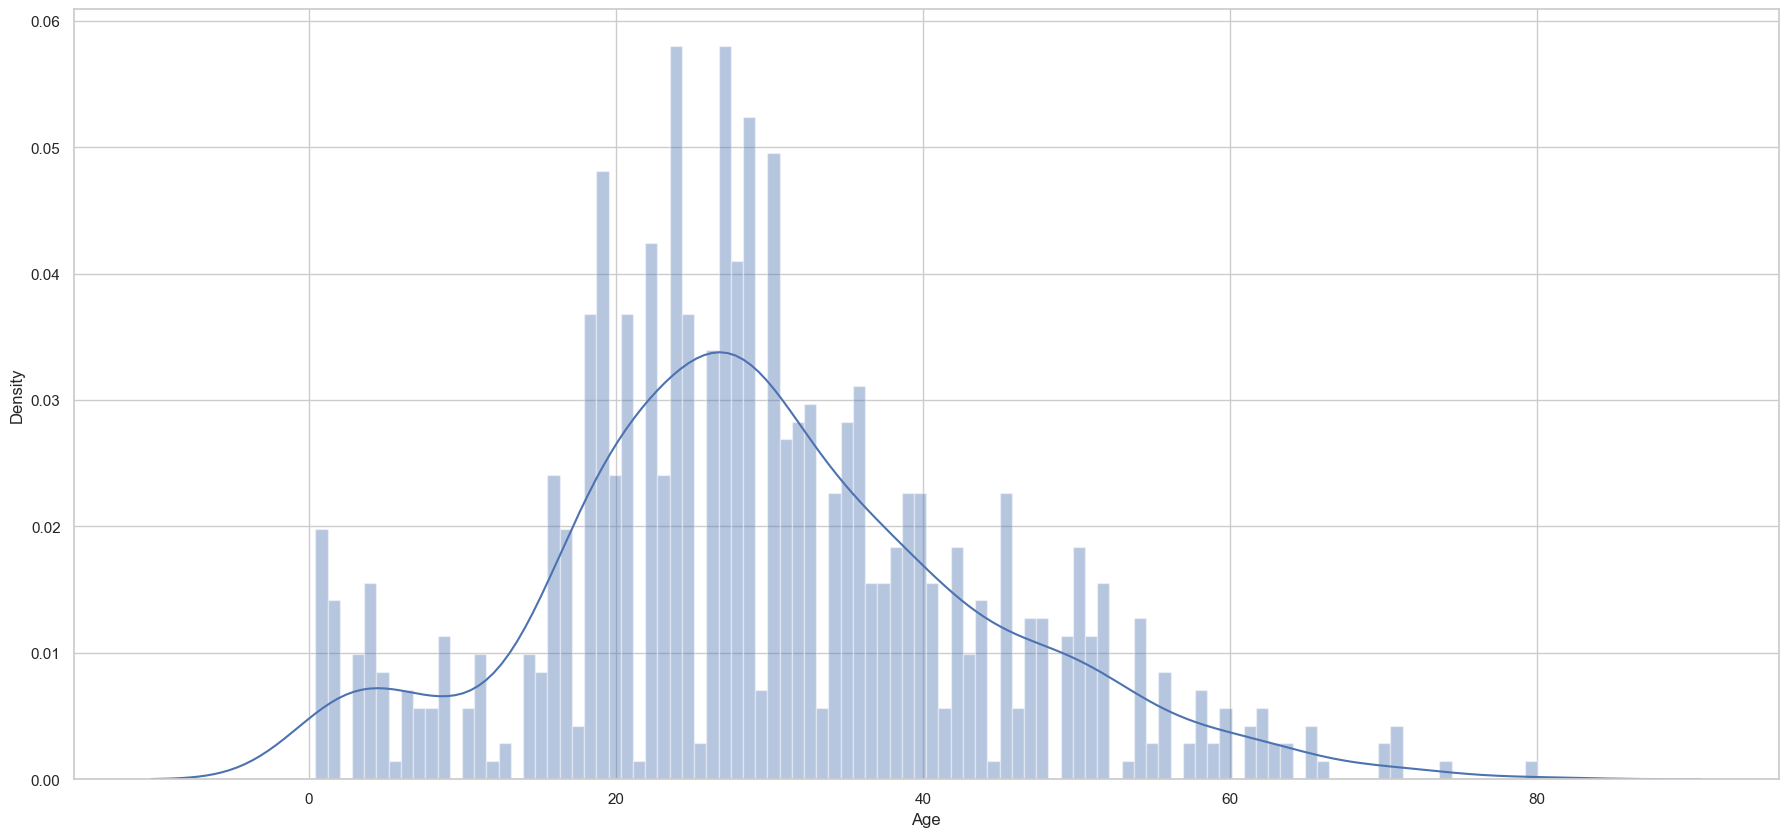

In [84]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

## age_group
我们可以通过对“年龄”列进行分组来创建一个新特征

In [85]:
## create bins for age
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

<div class="alert alert-danger">
<h1>需要解释此部分</h1>
<h2>特征选择</h2>
<h3>特征选择是机器学习模型的重要组成部分。 我们使用特征选择的原因有很多。</h3>
<ul>
     <li>简单的模型更容易解释。 根据模型结果行动的人对模型有更好的理解。</li>
     <li>训练时间更短。</li>
     <li>通过减少过度拟合来增强泛化能力。 </li>
     <li>软件开发人员更容易实施模型制作。</li>
         <ul>
             <li>作为数据科学家，我们需要记住不要创建包含太多变量的模型，因为这可能会让生产工程师不知所措。</li>
     </ul>
     <li>降低模型使用过程中数据错误的风险</li>
     <li>数据冗余</li>
</ul>
</div>

# 第 6 部分：建模前任务
## 6a。 分离因变量和自变量
<a id="dependent_independent"></a>
***
在我们应用任何机器学习模型之前，区分因变量和自变量非常重要。 我们的因变量或目标变量是我们试图找到的东西，我们的自变量是我们用来查找因变量的特征。 我们在数据集中使用机器学习算法的方式是通过指定自变量和因变量来训练机器学习模型。 为了指定它们，我们需要将它们彼此分开，下面的代码就是这样做的。

附： 在我们的测试数据集中，我们没有因变量特征。 我们将使用机器学习模型来预测这一点。

In [86]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

## 6b. 分割训练数据
<a id="split_training_data" ></a>
***
分割数据的方式有多种。 他们是...
* 训练_测试_分割。
* 交叉验证。

我们将依赖特征和独立特征分开； 我们将训练数据和测试数据分开。 那么，为什么我们仍然需要分割训练数据呢？ 如果你对此感到好奇，我有答案。 对于本次比赛，当我们训练机器学习算法时，我们使用部分训练集，通常是训练数据的三分之二。 一旦我们使用 2/3 的训练数据训练我们的算法，我们就开始使用剩余的数据测试我们的算法。 如果模型表现良好，我们会将测试数据转储到算法中以预测并提交竞赛。 下面的代码基本上将训练数据分为 4 部分：**X_train**、**X_test**、**y_train**、**y_test**。
* **X_train** 和 **y_train** 首先用于训练算法。
* 然后，**X_test** 用于经过训练的算法来预测 **结果。 **
* 一旦我们得到 **结果**，我们将其与 **y_test** 进行比较

通过将模型的**结果**与**y_test**进行比较，我们可以确定我们的算法是否表现良好。 当我们进行比较时，我们使用混淆矩阵来确定模型性能的不同方面。

附： 当我们使用交叉验证时，重要的是要记住不要使用 **X_train、X_test、y_train 和 y_test**，而是我们将使用 **X 和 y**。 我将对此进行更多讨论。

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [88]:
len(X_train)

594

In [89]:
len(X_test)

294

## 6c。 特征缩放
<a id="feature_scaling" ></a>
***
特征缩放是机器学习模型的一个重要概念。 通常，数据集包含大小和单位差异很大的特征。 对于某些机器学习模型来说，这不是问题。 然而，对于许多其他人来说，这是一个很大的问题。 许多机器学习算法使用欧几里得距离来计算两点之间的距离，这是一个相当大的问题。 让我们再次看一下下面的 **train** 数据集的示例。

In [90]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
806,0,39.0,1,0,0,1,0.0000,0,0,1,...,0,0,1,0,0,0,0,0,0,0
110,0,47.0,1,0,0,1,52.0000,0,0,1,...,0,1,0,0,0,1,0,0,0,0
194,1,44.0,0,0,0,1,27.7208,0,0,0,...,0,0,1,0,0,0,0,0,0,0
406,0,51.0,1,0,0,1,7.7500,0,0,1,...,0,0,0,0,0,1,0,0,0,0
285,0,33.0,1,0,0,1,8.6625,0,0,1,...,0,0,0,0,0,0,0,0,0,0


与其他机器学习功能相比，这里 **Age** 和 **Calculated_fare** 的数量级要高得多。 这可能会产生问题，因为许多机器学习模型会感到困惑，认为 **Age** 和 **Calculated_fare** 比其他特征具有更高的权重。 因此，我们需要进行特征缩放以获得更好的结果。
有多种方法可以进行特征缩放。
<ul>
     <li><b>MinMaxScaler</b> - 使用最大值和最小值缩放数据，使其介于 0 和 1 之间。</li>
     <li><b>StandardScaler</b>-缩放数据，使其均值为 0，方差为 1。</li>
     <li><b>RobustScaler</b> - 与标准缩放器类似地缩放数据，但利用中位数并使用分位数范围进行缩放，以避免出现大异常值的问题。</b>
  </ul>
我将在不同的内核中对此进行更多讨论。 现在，我们将使用<b>标准缩放器</b>来缩放我们的数据集。

附： 我将展示之前和之后的示例，以便您可以看到缩放如何更改数据集。

<h3><font color="$5831bc" face="Comic Sans MS">Before Scaling</font></h3>

In [91]:
headers = X_train.columns 

X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000,1,0,0,1,33.5000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000,1,0,0,1,26.5500,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
849,41.428,0,1,0,0,44.5521,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
433,17.000,1,0,0,1,7.1250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [92]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

<h3><font color="#5831bc" face="Comic Sans MS">After Scaling</font></h3>

In [93]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.257981,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.306468,-0.101015,5.099020,-0.286299,-0.200699
1,1.116417,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.200699
2,0.861563,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.200699
3,-0.881319,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.200699
4,-0.809971,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.449921,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.200699


You can see how the features have transformed above.

# 第 7 部分：数据建模
<a id="modelingthedata"></a>
***
在这个内核的之前版本中，我考虑过在应用每个模型之前对其进行解释。 然而，这个过程使得这个内核太长，无法一口气阅读。 因此，我决定分解这个内核，并在不同的内核中解释每个算法，并在此处添加链接。 如果您想回顾逻辑回归，请点击[此处](https://www.kaggle.com/masumrumi/logistic-regression-with-titanic-dataset)。

In [94]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

<h1><font color="#5831bc"face="Comic Sans MS">评估分类模型</font></h1>

评估分类模型的方法有多种。

* 混淆矩阵。
* ROC曲线
* AUC 曲线。


## 混淆矩阵
<b>混淆矩阵</b>，一个<b>描述分类模型性能</b>的表格。 混淆矩阵通过比较实际情况和预测情况，告诉我们我们的模型在二元/多个结果类别方面预测正确和错误的数量。 例如，就这个数据集而言，我们的模型是二元模型，我们试图对乘客是否幸存进行分类。 我们使用 **X_train** 和 **y_train** 拟合模型，并在变量 **y_pred** 中预测 **X_test** 的结果。 因此，现在我们将使用混淆矩阵来比较 **y_test** 和 **y_pred**。 让我们做一下混淆矩阵。

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,149,28
Survived,30,87


我们的**y_test**共有294个数据点； 我们为了评估我们的模型而分割的原始训练集的一部分。 这里的每个数字代表我们模型的某些细节。 如果我们从列和原始数据的角度来考虑这一点，我们可以看到......

* 第一列是机器预测为未幸存的数据点。
* 第二列是模型预测为幸存者的统计数据。
* 就原始数据而言，第一个原始索引为“未存活”意味着该原始数据中的值是未存活一次的实际统计数据。
* 和“幸存”索引原始值是实际幸存的值。

现在您可以看到预测的未幸存和预测的幸存与实际的幸存和实际的未幸存有一定程度的重叠。 毕竟它是一个矩阵，我们有一些术语来更具体地调用这些统计数据。 让我们看看它们是什么

<ul style="list-style-type:square;">
     <li><b>真阳性 (TP)</b>：模型预测为“是”（幸存）且实际为“是”（幸存）的值。</li>
     <li><b>True Negative(TN)</b>：模型预测为 no（未幸存）且实际为 no（未幸存）的值</li>
     <li><b>误报（或 I 类错误）</b>：模型预测为“是”（幸存）但实际为“否”（未幸存）的值</li>
     <li><b>假阴性（或 II 类错误）</b>：模型预测为“否”（未幸存）但实际为“是”（幸存）的值</li>
</ul>

对于此数据集，每当模型预测某些内容为“是”时，就意味着该模型正在预测乘客幸存，而对于模型预测为“否”的情况； 这意味着乘客没有生还。 让我们确定上面所有这些术语的价值。
<ul style="list-style-type:square;">
     <li><b>真阳性（TP）：87</b></li>
     <li><b>真阴性（TN）：149</b></li>
     <li><b>误报（FP）：28</b></li>
     <li><b>漏报（FN）：30</b></li>
</ul>
根据这四个术语，我们可以计算用于评估二元分类器的许多其他速率。


#### 准确性：
**准确度是模型正确频率的衡量标准**
* (TP + TN)/总计 = (87+149)/294 = .8027

我们还可以使用 scikit learn 计算准确度分数。

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8027210884353742

**错误分类率：**错误分类率是模型错误频率的衡量标准**
* 误分类率和准确率是相反的。
* 错误分类相当于 1 减去准确度。
* 误分类率也称为“错误率”。

> (FP + FN)/总计 = (28+30)/294 = 0.19

**真阳性率/召回率/灵敏度：** 当模型实际预测为“是（幸存）”时，模型预测“是（幸存）”的频率有多少？
> TP/(TP+FN) = 87/(87+30) = 0.7435897435897436

In [97]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7435897435897436

**误报率：** 模型预测“是”（幸存）而实际上“否”（未幸存）的频率有多少？
> FP/(FP+TN) = 28/(28+149) = 0.15819209039548024

**真负率/特异性：** 当实际情况为“无”（未存活）时，模型预测“无”（未存活）的频率有多少？
* 真阴性率等于 1 减去假阳性率。

> TN/(TN+FP) = 149/(149+28) = 0.8418079096045198

**精度：** 当模型预测为“是”时，正确的频率是多少。
> 目标价/(目标价+FP) = 87/(87+28) = 0.7565217391304347

In [98]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7565217391304347

In [99]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       177
           1       0.76      0.74      0.75       117

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



我们有我们的混淆矩阵。 我们给它多一点个性怎么样？

Confusion matrix, without normalization
[[149  28]
 [ 30  87]]
Normalized confusion matrix
[[0.84 0.16]
 [0.26 0.74]]


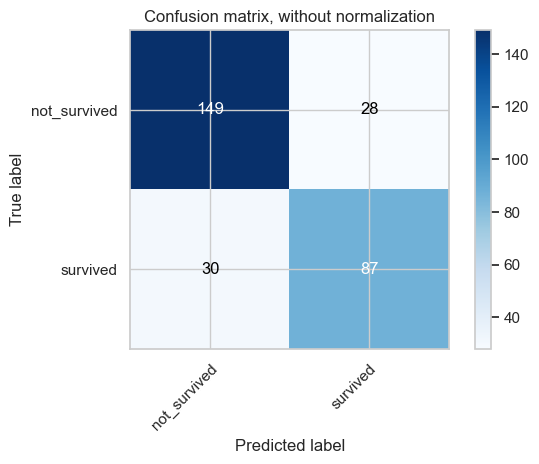

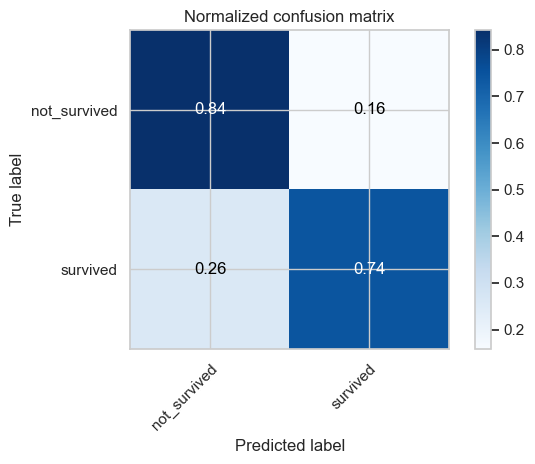

In [100]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<h1>AUC & ROC Curve</h1>

0.8350234197691824


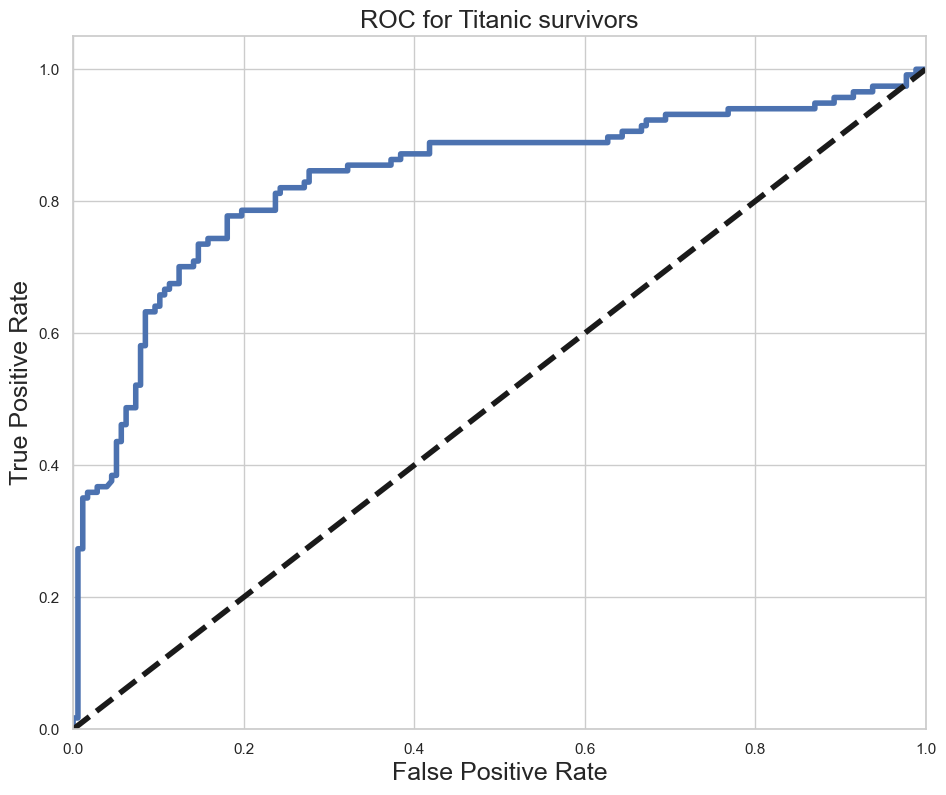

In [101]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

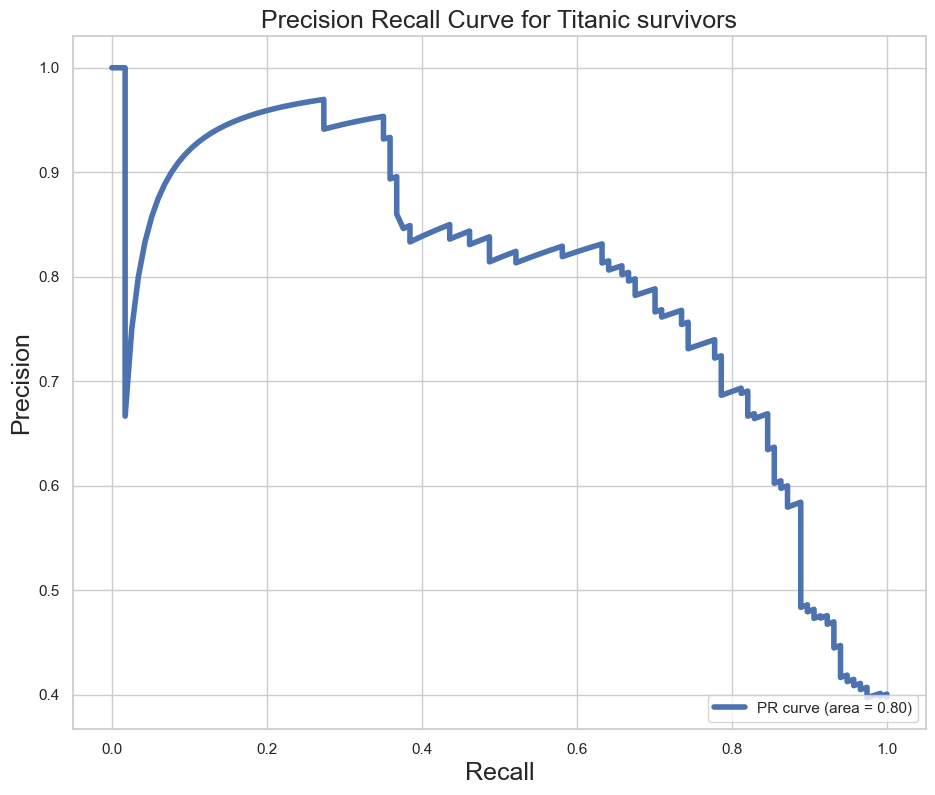

In [102]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## 使用交叉验证：
优点：
* 有助于减少方差。
* 增强模型的可预测性。


In [103]:
sc = st_scale

In [104]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.82 0.85 0.81 0.85 0.83 0.82 0.8  0.85 0.82 0.82]
Mean Cross-Validation accuracy score: 0.82703


## Logistic 回归的网格搜索
* 什么是网格搜索？
* 优缺点都有什么？

**网格搜索**是机器学习中一个简单的概念但有效的技术。 **GridSearch** 一词代表我们正在“网格”上搜索最佳参数。 这些最佳参数也称为**超参数**。 **超参数是在拟合模型之前设置的模型参数，并确定模型的行为。**。 例如，当我们选择使用线性回归时，我们可能会决定向损失函数添加惩罚，例如 Ridge 或 Lasso。 这些惩罚需要预先设置特定的 alpha（正则化技术的强度）。 alpha 值越高，添加的惩罚就越多。 GridSearch 在我们提供的一系列值中找到 alpha 的最佳值，然后我们继续使用该最佳值来拟合模型并获得良好的结果。 必须了解这些模型参数与模型结果不同，例如，**系数**或模型评估指标（例如**准确度分数**或**均方误差**）是模型结果，与超参数不同。

#### 内核的这一部分是一个工作进展。 请再次回来查看未来的更新。####

In [105]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [106]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)



0.8247747747747749
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


#### 使用网格搜索中的最佳参数。

In [107]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8412162162162162

#### 内核的这一部分是一个工作进展。 请再次回来查看未来的更新。####
 
  资源：
  * [混淆矩阵](https://www.youtube.com/watch?v=8Oog7TXHvFY)
### 欠拟合和过拟合：
所以，我们有了第一个模型及其分数。 但是，我们如何确保我们的模型表现良好。 我们的模型可能过度拟合或欠拟合。 事实上，对于那些不知道什么是过拟合和欠拟合的人，让我们来了解一下。

![](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/fittings.jpg)

正如您在上图中看到的那样。 **欠拟合**是指模型无法捕获数据的重要方面，从而引入更多偏差并表现不佳。 另一方面，**过度拟合**是指模型在训练数据上表现太好，但在验证集或测试集上表现不佳。 这种情况也被称为偏差较小但变化较多且表现不佳。 理想情况下，我们希望配置一个不仅在训练数据上而且在测试数据上都表现良好的模型。 这就是**偏差-方差权衡**的用武之地。当我们有一个过度拟合的模型时，意味着偏差较小，方差较多，我们会引入一些偏差，以换取更少的方差。 此任务的一种特殊策略是正则化模型（Ridge、Lasso、Elastic Net）。 这些模型是为了处理偏差-方差权衡而构建的。 这个[kernel](https://www.kaggle.com/dansbecker/underfitting-and-overfitting)很好地解释了这个主题。 另外，下面的图表让我们对模型的位置有一个大概的了解。
![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

理想情况下，我们希望选择一个最佳点，使模型在训练集、验证集和测试集上表现良好。 随着模型变得复杂，偏差减少，方差增加。 然而，最关键的部分是错误率。 我们希望我们的模型位于 **U** 形状的底部，那里的错误率最低。 该最佳点也称为**最佳模型复杂度 (OMC)。**

现在我们知道了我们想要的欠拟合和过拟合是什么，让我们来谈谈如何解决它们。

如何对抗过度拟合？
<ul>
     <li>使用更少的参数简化模型。</li>
     <li>通过更改超参数来简化模型。</li>
     <li>引入正则化模型。 </li>
     <li>使用更多训练数据。 </li>
     <li>收集更多数据（并收集质量更高的数据）。 </li>
     </ul>
  #### 内核的这一部分是一个工作进展。 请再次回来查看未来的更新。####

## 7b. K-Nearest Neighbor classifier(KNN)
<a id="knn"></a>
***

In [108]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.82 0.81 0.78 0.8  0.82 0.82 0.79 0.79 0.77 0.82]
Mean Cross-Validation accuracy score: 0.801


#### Manually find the best possible k value for KNN

In [109]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))


Accuracy scores are: [0.7522522522522523, 0.777927927927928, 0.7936936936936936, 0.7878378378378377, 0.8013513513513514, 0.8022522522522524, 0.7981981981981981, 0.7941441441441441, 0.8009009009009009, 0.7923423423423424, 0.7972972972972973, 0.7900900900900901, 0.7963963963963964, 0.7923423423423422, 0.8004504504504505, 0.7842342342342342, 0.7887387387387388, 0.777927927927928, 0.7882882882882883, 0.7824324324324323, 0.786036036036036, 0.7774774774774774, 0.7837837837837839, 0.7738738738738739, 0.777927927927928, 0.7644144144144145, 0.7666666666666667, 0.7603603603603604, 0.763963963963964, 0.7554054054054056]

Mean accuracy score: 0.7836336336336334


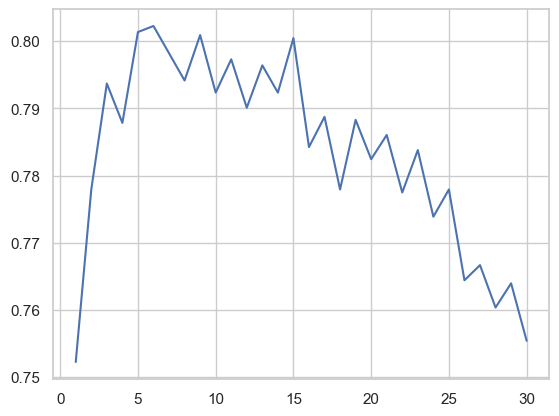

In [110]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

### Grid search on KNN classifier

In [111]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [112]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8059925093632959
{'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=7)


#### Using best estimator from grid search using KNN. 

In [113]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

0.8547297297297297

#### Using RandomizedSearchCV
随机搜索是网格搜索的近亲。 它并不总是提供最好的结果，但速度很快。

In [114]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   verbose=False)

In [115]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.801123595505618
{'weights': 'uniform', 'n_neighbors': 5}
KNeighborsClassifier()


In [116]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X,y)

0.8648648648648649

## Gaussian Naive Bayes
<a id="gaussian_naive"></a>
***

In [117]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.789


## Support Vector Machines(SVM)
<a id="svm"></a>
***

In [118]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

In [119]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.845318352059925
{'C': 2, 'gamma': 0.001}
SVC(C=2, gamma=0.001, probability=True)


In [120]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.8265765765765766

## Decision Tree Classifier

决策树的工作原理是将数据集分解为小子集。 这个分解过程是通过询问有关数据集特征的问题来完成的。 这个想法是通过提出更少的必要问题来分解标签。 当我们提出问题时，我们将数据集分解为更多的子集。 一旦我们有了一个仅包含唯一类型标签的子组，我们就以该节点结束树。 如果您想详细了解决策树分类器，请查看[此](https://www.kaggle.com/masumrumi/decision-tree-with-titanic-dataset)内核。

In [121]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'auto']},
             verbose=False)

In [122]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 30}
0.8357575757575757
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=30)


In [123]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.8558558558558559

<h4> 让我们看看决策树网格中的特征重要性。</h4>

In [124]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_Mr,0.479434
calculated_fare,0.162406
Pclass_3,0.122943
title_rare,0.078304
family_group_large,0.072821
Sex,0.024549
age_group_senior_citizen,0.016824
Pclass_2,0.015292
Cabin_D,0.009741
age_group_infant,0.007351


这些是由 **决策树** 确定的十大特征，帮助对泰坦尼克号当晚许多乘客的命运进行分类。

## 7f. Random Forest Classifier
<a id="random_forest"></a>

我很欣赏使用决策树，因为它们为构建更复杂的模型（如随机森林（RF））提供了潜力和基础。 RF 是一种集成方法（许多决策树的组合），这就是“森林”部分的用武之地。关于随机森林的一个重要细节是，在使用决策树森林时，RF 模型<b>采用原始数据的随机子集 数据集（引导）</b> 和<b>变量的随机子集（特征/列）</b>。 使用这种方法，RF模型创建了100到1000个（数量可以通过菜单确定）各种各样的决策树。 这种多样性使得 RF 模型更加有效和准确。 然后，我们通过所有这数百到数千个决策树或 RF 模型运行每个测试数据点，并对输出进行投票。

In [125]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [126]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.843071161048689
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}
RandomForestClassifier(max_depth=5, n_estimators=150)


In [127]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8423423423423423

In [128]:
from sklearn.metrics import classification_report
# Print classification report for y_test
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       177
           1       0.74      0.72      0.73       117

    accuracy                           0.79       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



## Feature Importance

In [129]:
## feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_Mr,0.210696
Sex,0.159893
title_Miss,0.081999
calculated_fare,0.069621
title_Mrs,0.060302
Pclass_3,0.052594
Age,0.044148
family_group_small,0.031190
Pclass_1,0.026891
family_group_large,0.026250


<h3>Why Random Forest?(Pros and Cons)</h3>

***
<h2>集成学习简介</h2>
在统计学和机器学习中，集成方法使用多种学习算法来获得比单独使用任何组成学习算法更好的预测性能。

集成学习有两种类型。

**装袋/平均方法**
> 在平均方法中，驱动原理是独立构建多个估计器，然后对它们的预测进行平均。 平均而言，组合估计器通常优于任何单一基本估计器，因为其方差减小了。

**提升方法**
> 集成方法的另一类是增强方法，其中基本估计器是按顺序构建的，并且试图减少组合估计器的偏差。 其动机是将几个弱模型组合起来产生一个强大的集成。


***
## 7g。 装袋分级机
<a id="装袋"></a>
***

<a href="https://scikit-learn.org/stable/modules/ generated/sklearn.ensemble.BaggingClassifier.html">Bagging Classifier</a>（Bootstrap Aggregating）是涉及操作训练集的集成方法 通过对其进行重新采样和运行算法。 让我们快速回顾一下：
* Bagging 分类器使用一种称为引导数据集的过程从一个原始数据集创建多个数据集，并对每个数据集运行算法。 这是一张显示引导数据集如何工作的图像。
<img src="https://uc-r.github.io/public/images/analytics/bootstrap/bootstrap.png" width="600">
<h4align="center">从原始数据集重采样到引导数据集</h4>
<h4align="right">来源：https://uc-r.github.io</h4>


* 在每个引导数据集上运行学习算法后，所有模型通过取平均值进行组合。 然后测试数据/新数据通过这个平均分类器/组合分类器并预测输出。

这是一张图片，可以清楚地说明装袋的工作原理，
<img src="https://prachimjoshi.files.wordpress.com/2015/07/screen_shot_2010-12-03_at_5-46-21_pm.png" width="600">
<h4align="right">来源：https://prachimjoshi.files.wordpress.com</h4>
如果您想了解有关装袋分类器的更多信息，请查看[此](https://www.kaggle.com/masumrumi/bagging-with-titanic-dataset)内核。

In [130]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(base_estimator=None), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [131]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8176029962546816
{'n_estimators': 70}
BaggingClassifier(base_estimator=None, n_estimators=70)


In [132]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9887387387387387

<h3>为什么要使用Bagging？ （优点和缺点）</h3>
Bagging 最适合强大且复杂的模型（例如，完全开发的决策树）。 但是，不要让这种想法欺骗您，认为与决策树类似，装袋也会使模型过拟合。 相反，装袋可以减少过度拟合，因为大量样本训练数据会被重复并用于创建基本估计器。 由于有大量同样可能的训练数据，装袋不太容易受到噪声数据的过度拟合，因此减少了方差。 然而，缺点是这会导致偏差增加。

<h4>随机森林 VS. 装袋分类器</h4>

如果你们中的一些人像我一样，您可能会发现随机森林与装袋分类器类似。 然而，这两者之间有一个根本的区别，那就是**随机森林能够在每个节点中选择特征子集。**我将在未来的更新中详细说明这一点。

## 7 小时。 AdaBoost 分类器
<a id="AdaBoost"></a>
***
AdaBoost 是另一个<b>集成模型</b>，与 Bagging 有很大不同。 让我们指出核心概念。
> AdaBoost 结合了很多“弱学习器”（它们也称为树桩；只有一个节点和两个叶子的树）来进行分类。

> 此基本模型拟合是一个迭代过程，其中每个树桩都一个接一个地链接起来； <b>它不能并行运行。</b>

> <b>某些树桩在最终分类中比其他树桩拥有更多发言权。</b>模型使用分配给每个数据点/原始数据的权重来表明其“重要性”。 权重较高的样本对下一个模型的总误差影响较大，并获得更高的优先级。 第一个树桩以均匀分布的权重开始，这意味着在开始时，每个数据点都具有相等的权重。

> <b>每个树桩都是通过考虑前一个树桩的错误来制作的。</b>每次迭代后，都会重新计算权重，以便考虑上一个树桩的错误/错误分类。

> 最终预测通常通过加权投票构建，其中每个基本模型的权重取决于其训练误差或错误分类率。

为了说明我们到目前为止所讨论的内容，让我们看一下下面的可视化。

<img src="https://cdn-images-1.medium.com/max/1600/0*paPv7vXuq4eBHZY7.png">
<h5align="right">来源：Diogo（中）</h5>




让我们深入了解 AdaBoost 的每一个细节：
***
> <b>首先</b>，我们使用基尼指数确定分割数据集的最佳特征（决策树的基础知识）。 基尼指数最低的特征成为 AdaBoost 树桩链中的第一个树桩（基尼指数越低，标签的分离效果越好，因此分割效果越好）。
***
> <b>其次</b>，我们需要确定树桩在最终分类中的发言权以及如何计算。
* 我们通过计算树桩对样本的分类效果（也称为计算权重的总误差）来了解树桩在最终分类中的发言权。
* 树桩的<b>总误差</b>是与错误分类样本相关的权重总和。 例如，假设我们开始一个包含 10 个数据集的树桩。 第一个树桩将在所有数据点之间均匀分配权重。 这意味着每个数据点都有 1/10 的权重。 假设权重分配完毕后，我们运行模型并发现 2 个不正确的预测。 为了计算总误差，我们将所有错误分类的权重相加。 这里我们得到 1/10 + 1/10 = 2/10 或 1/5。 这是我们的全部错误。 我们也可以思考一下


$$ \epsilon_t = \frac{\text{错误分类}_t}{\text{观察}_t} $$


* 由于权重在所有数据点之间均匀分布（全部加起来为 1），因此总误差将始终在 0（完美树桩）和 1（可怕树桩）之间。
* 我们使用总误差来确定树桩在最终分类中的数量，使用以下公式
 

$$ \alpha_t = \frac{1}{2}ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right) \text{其中 } \epsilon_t < 1$$


其中 $\epsilon_t$ 是当前分类器的误分类率：


$$ \epsilon_t = \frac{\text{错误分类}_t}{\text{观察}_t} $$


这里...
* $\alpha_t$ = 发言量
* $\epsilon_t$ = 总误差

我们可以绘制一个图表来使用总误差值（0 到 1）来确定 say 的数量

<img src="http://chrisjmccormick.files.wordpress.com/2013/12/adaboost_alphacurve.png">
<h5align="right">来源：克里斯·麦考密克</h5>

* 蓝线告诉我们 <b>总错误（错误率）</b> 在 0 到 1 之间的数量。
* 当树桩做得相当好，并且<b>总误差</b>最小时，那么<b>say(Alpha)的量</b>相对较大，并且alpha值为正。
* 当树桩表现一般时（类似于抛硬币/正确与错误的比率约为 50%/50%），则<b>总错误</b>约为 0.5。 在这种情况下，<b>说的金额</b>是<b>0</b>。
* 当错误率很高时，假设接近 1，那么 <b>say 的数量</b>将为负数，这意味着如果树桩输出一个值“幸存”，则包含的权重将将该值变成“ 没有幸存。”

附： 如果<b>总误差</b>为 1 或 0，那么这个方程就会崩溃。 添加少量错误以防止这种情况发生。
 
  ***
> <b>第三</b>，我们需要学习如何修改权重，以便下一个树桩能够考虑到当前树桩所产生的误差。 计算新样本权重的伪代码如下。


$$ 新样本权重 = 样本权重 + e^{\alpha_t}$$

这里 $\alpha_t(AmountOfSay)$ 可以是正数或负数，具体取决于样本是否被当前树桩正确分类或错误分类。 我们要增加误分类样本的样本权重； 暗示下一个树桩，以更加强调这些。 反过来，我们要减少正确分类样本的样本权重； 暗示下一个树桩，以减少对这些树桩的强调。

下面的等式可以帮助我们进行这个计算。

$$ D_{t+1}(i) = D_t(i) e^{-\alpha_t y_i h_t(x_i)} $$

这里，
* $D_{t+1}(i)$ = 新样本权重。
* $D_t(i)$ = 当前样本重量。
* $\alpha_t$ = 比如说，alpha 值，这是在每次迭代中更新的系数
* $y_i h_t(x_i)$ = 占位符，如果树桩分类正确则为 1，如果分类错误则为 -1。

最后，我们将组合分类器放在一起，即

$$ AdaBoost(X) = 符号\left(\sum_{t=1}^T\alpha_t h_t(X)\right) $$

这里，

$AdaBoost(X)$ 是使用预测矩阵 $X$ 对 $y$ 进行的分类预测

$T$ 是“弱学习器”的集合

$\alpha_t$ 是弱学习者 $t$ 的贡献权重

$h_t(X)$是弱学习者$t$的预测

$y$ 是二进制 **，值为 -1 和 1**


附： 由于树桩几乎没有捕获数据集的基本规格，因此该模型一开始就存在很大偏差。 然而，随着树桩链的继续，并在该过程结束时，AdaBoost 成为一棵强大的树，并减少偏差和方差。


In [133]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(base_estimator=None), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185]})

In [134]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8235955056179776
{'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostClassifier(base_estimator=None, learning_rate=0.1, n_estimators=100)


In [135]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X,y)

0.8355855855855856

## 提升的优点和缺点

---

### 优点

- 当超参数调整得当时，可以获得比 bagging 更高的性能。
- 同样可以用于分类和回归。
- 轻松处理混合数据类型。
- 可以使用“稳健”的损失函数，使模型能够抵抗异常值。

---

### 缺点

- 正确调整超参数既困难又耗时。
- 无法像 bagging 那样并行化（当数据量很大时可扩展性较差）。
- 与 bagging 相比，过度拟合的风险更大。


## 7i. Gradient Boosting Classifier
<a id="gradient_boosting"></a>
***

In [136]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.871


## 7j. XGBClassifier
<a id="XGBClassifier"></a>
***

In [137]:
# from xgboost import XGBClassifier
# XGBClassifier = XGBClassifier()
# XGBClassifier.fit(X, y)
# y_pred = XGBClassifier.predict(X_test)
# XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
# print(XGBClassifier_accy)

## 7k. Extra Trees Classifier
<a id="extra_tree"></a>
***

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)


0.966


## 7l. Gaussian Process Classifier
<a id="GaussianProcessClassifier"></a>
***

In [139]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.925


## 7m. Voting Classifier
<a id="voting_classifer"></a>
***

In [140]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient_boost),
    ('decision_tree_grid',dectree_grid),
    ('knn_classifier', knn_grid),
#     ('XGB_Classifier', XGBClassifier),
    ('bagging_classifier', bagging_grid),
    ('adaBoost_classifier',adaBoost_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
    ('gaussian_classifier',gaussian),
    ('gaussian_process_classifier', GaussianProcessClassifier)
],voting='hard')

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(X,y)

In [141]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.864


In [145]:
# models = pd.DataFrame({
#    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#              'Random Forest', 'Naive Bayes', 
#              'Decision Tree', 'Gradient Boosting Classifier', 'Voting Classifier', 'XGB Classifier','ExtraTrees Classifier','Bagging Classifier'],
#    'Score': [svc_accy, knn_accy, logreg_accy, 
#              random_accy, gaussian_accy, dectree_accy,
#               gradient_accy, voting_accy, XGBClassifier_accy, extraTree_accy, bagging_accy]})
# models.sort_values(by='Score', ascending=False)

NameError: name 'svc_accy' is not defined

# Part 8: Submit test predictions
<a id="submit_predictions"></a>
***

In [143]:
all_models = [logreg_grid,
              knn_grid, 
              knn_ran_grid,
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              adaBoost_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b
    


In [144]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)